# 0. ÌôòÍ≤ΩÏÑ§Ï†ï

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/BOAZ/[202207]·ÑÜ·ÖÆ·Ü´·Ñí·Ö™·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´

/content/drive/MyDrive/BOAZ/[202207]·ÑÜ·ÖÆ·Ü´·Ñí·Ö™·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# ÏãúÍ∞ÅÌôî Í¥ÄÎ†®
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from PIL import Image

In [ ]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# Í∑∏ÎûòÌîÑÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏ Íπ®ÏßÄÎäî Î¨∏Ï†úÏóê ÎåÄÌïú ÎåÄÏ≤ò(Ï†ÑÏó≠ Í∏ÄÍº¥ ÏÑ§Ï†ï)
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name() # Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÇ¨Ïù¥Ï¶à : 10


plt.rc('font', family='NanumGothic')
fm._rebuild()


# 1. Î∞©ÌÉÑÏÜåÎÖÑÎã®Ïùò Ïù∏Í∏∞

## - ÎßåÎÇòÍ≥† Ïã∂ÏùÄ ÌïúÎ•òÏä§ÌÉÄ

- ÌäπÏ†ï ÏßàÎ¨∏Ïóê ÎåÄÌïú Ï§ëÍµ≠, ÏùºÎ≥∏, ÎåÄÎßå Îì± Ï¥ù 14~17Í∞úÍµ≠Ïùò ÏùëÎãµÍ≤∞Í≥ºÎ•º Ïïå Ïàò ÏûàÏùå
- Q. Íº≠ ÎßåÎÇòÍ≥† Ïã∂ÏùÄ ÌïúÎ•ò Ïä§ÌÉÄÎäî ÎàÑÍµ¨ÏûÖÎãàÍπå? ÌïúÎ™ÖÎßå ÏûÖÎ†•Ìï¥ Ï£ºÏÑ∏Ïöî
- n(Ï°∞ÏÇ¨ ÏùëÎãµÏûê)Í∞íÏùÄ Ïó∞ÎèÑÎ≥ÑÎ°ú Ï∞®Ïù¥Í∞Ä ÏûàÏùå
- ÏàòÏπò Îã®ÏúÑÎäî % Ïù¥Î©∞, ÌëúÎ≥∏ ÏàòÎ•º ÏÑ±Î≥Ñ, Ïó∞Î†πÎåÄÎ≥ÑÎ°ú ÎÇòÎàà ÏùëÎãµÎπÑÏú®ÏûÑ

In [ ]:
star = pd.read_csv('HOPE_KSTAR_INFO_2021(ÎßåÎÇòÍ≥†Ïã∂ÏùÄÌïúÎ•òÏä§ÌÉÄ).csv')
star.head()

STAR_NM  MALE_RATE  FEMALE_RATE  ALL_N10S_RATE  ALL_N20S_RATE  \
0     Ïù¥ÎØºÌò∏        6.8          9.6           10.4            8.8   
1     Ï†ÑÏßÄÌòÑ        9.2          6.8            8.0            5.6   
2     ÏÜ°ÌòúÍµê        6.4          8.0            3.2            7.2   
3     ÏÜ°Ï§ëÍ∏∞        4.8          8.4            9.6           11.2   
4     ÍπÄÌù¨ÏÑ†        5.2          4.0            0.0            2.4   

   ALL_N30S_RATE  ALL_N40S_RATE  ALL_N50S_RATE  REPRT_YEAR_CN  \
0            4.8            9.0            8.0           2019   
1            9.6           10.0            4.0           2019   
2            9.6           10.0            4.0           2019   
3            2.4            4.0            0.0           2019   
4           10.4            5.0            8.0           2019   

  EXAMIN_COUNTRY_NM  
0                Ï§ëÍµ≠  
1                Ï§ëÍµ≠  
2                Ï§ëÍµ≠  
3                Ï§ëÍµ≠  
4                Ï§ëÍµ≠

In [ ]:
#Ïó∞Î†πÎåÄ ÏùëÎãµÎπÑÏú® ÌèâÍ∑† ÏπºÎüºÍ∞íÏÉùÏÑ±
star['all_age'] = (star['ALL_N10S_RATE'] + star['ALL_N20S_RATE'] + star['ALL_N30S_RATE'] +star['ALL_N40S_RATE'] + star['ALL_N50S_RATE'])/5
star.head()

STAR_NM  MALE_RATE  FEMALE_RATE  ALL_N10S_RATE  ALL_N20S_RATE  \
0     Ïù¥ÎØºÌò∏        6.8          9.6           10.4            8.8   
1     Ï†ÑÏßÄÌòÑ        9.2          6.8            8.0            5.6   
2     ÏÜ°ÌòúÍµê        6.4          8.0            3.2            7.2   
3     ÏÜ°Ï§ëÍ∏∞        4.8          8.4            9.6           11.2   
4     ÍπÄÌù¨ÏÑ†        5.2          4.0            0.0            2.4   

   ALL_N30S_RATE  ALL_N40S_RATE  ALL_N50S_RATE  REPRT_YEAR_CN  \
0            4.8            9.0            8.0           2019   
1            9.6           10.0            4.0           2019   
2            9.6           10.0            4.0           2019   
3            2.4            4.0            0.0           2019   
4           10.4            5.0            8.0           2019   

  EXAMIN_COUNTRY_NM  all_age  
0                Ï§ëÍµ≠     8.20  
1                Ï§ëÍµ≠     7.44  
2                Ï§ëÍµ≠     6.80  
3                Ï§ëÍµ≠     5.44  
4                Ï§ëÍµ≠     5.16

In [ ]:
#ÌïúÎ•òÏä§ÌÉÄÎ≥Ñ ÏùëÎãµÎπÑÏú®Ìï©Í≥Ñ
starname =star.pivot_table(values = 'all_age', index=['STAR_NM'],aggfunc="sum")
#ÎÇ¥Î¶ºÏ∞®ÏàúÏ†ïÎ†¨
starname=starname.sort_values(by = ['all_age'], ascending = False).head(10)

In [ ]:
#starname['ÌïúÎ•òÏä§ÌÉÄ'] = starname.index
starname =starname.reset_index()
starname


STAR_NM  all_age
0   Î∞©ÌÉÑÏÜåÎÖÑÎã®   778.76
1     Ïù¥ÎØºÌò∏   420.26
2    Î∏îÎûôÌïëÌÅ¨   354.30
3      Ïã∏Ïù¥   269.56
4     ÏÜ°ÌòúÍµê   123.30
5      ÏóëÏÜå   101.10
6      Í≥µÏú†    98.30
7    Ìä∏ÏôÄÏù¥Ïä§    97.36
8      ÎπÖÎ±Ö    94.48
9    ÏÜåÎÖÄÏãúÎåÄ    90.44

Text(0.5, 1.0, 'ÎßåÎÇòÍ≥†Ïã∂ÏùÄ ÌïúÎ•òÏä§ÌÉÄ')

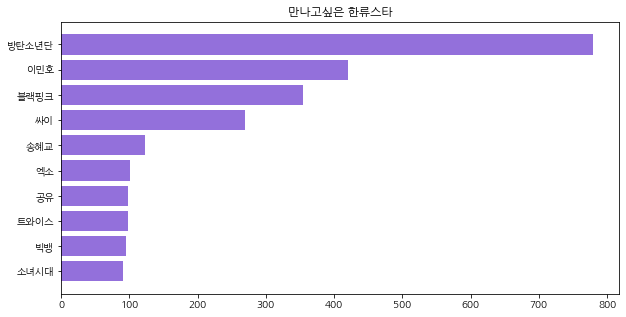

In [ ]:
plt.figure(figsize=(10, 5))
starname = starname.sort_values(by=['all_age'], ascending=True)
plt.barh(starname['STAR_NM'],starname['all_age'],color = 'mediumpurple')
plt.title("ÎßåÎÇòÍ≥†Ïã∂ÏùÄ ÌïúÎ•òÏä§ÌÉÄ")

->14~17Í∞úÍµ≠ÏóêÏÑú ÎßåÎÇòÍ≥† Ïã∂ÏùÄ ÌïúÎ•òÏä§ÌÉÄÎ•º Î¨ªÎäî ÏßàÎ¨∏Ïóê ÎåÄÌï¥ Ïó∞Î†πÎ≥Ñ ÏùëÎãµÎπÑÏú®Ìï©Í≥ÑÏóê Îî∞Îùº Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥¥ÏïòÏùÑÎïå, Í∞ÄÏàòÎäî Î∞©ÌÉÑÏÜåÎÖÑÎã®, Î∏îÎûôÌïëÌÅ¨, Ïã∏Ïù¥Í∞Ä top3Î•º Ï∞®ÏßÄÌïòÏòÄÏúºÎ©∞, Î∞∞Ïö∞Îäî Ïù¥ÎØºÌò∏,ÏÜ°ÌòúÍµê, Í≥µÏú†Í∞Ä top3Î•º Ï∞®ÏßÄÌïòÏòÄÎã§. 1ÏúÑÏù∏ Î∞©ÌÉÑÏÜåÎÖÑÎã®Ïùò Í≤ΩÏö∞ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÌÅ∞ Ïù∏Í∏∞Î•º ÎÅåÍ≥† ÏûàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## - Ïú†ÌäúÎ∏åÏàúÏúÑ

- K-POP ÏïÑÌã∞Ïä§Ìä∏Îì§Ïùò Ïú†ÌäúÎ∏å Ï°∞ÌöåÏàòÎäî ÏñºÎßàÎÇò Îê†Íπå?
- Ïú†ÌäúÎ∏å ÏòÅÏÉÅ ÏïÑÏù¥ÎèåÎ≥Ñ Ï°∞ÌöåÏàò ÌòÑÌô©Îç∞Ïù¥ÌÑ∞Î•º 
- ÎØ∏Íµ≠, Î≤†Ìä∏ÎÇ®,Ïù∏ÎèÑÎÑ§ÏãúÏïÑ,Ìò∏Ï£º, ÏòÅÍµ≠Ïùò Îç∞Ïù¥ÌÑ∞

In [ ]:
youtube1 = pd.read_csv('KC_YOUTUBE_VIEW_AU_2019.csv')
youtube2 = pd.read_csv('KC_YOUTUBE_VIEW_GB_2019.csv')
youtube3 = pd.read_csv('KC_YOUTUBE_VIEW_ID_2019.csv')
youtube4 = pd.read_csv('KC_YOUTUBE_VIEW_US_2019.csv')
youtube5 = pd.read_csv('KC_YOUTUBE_VIEW_VN_2019.csv')
#Îç∞Ïù¥ÌÑ∞ ÌòïÏãùÏù¥ Í∞ôÏùÄ Í≤ÉÏùÑ ÌôïÏù∏->Ìï©ÏπòÍ∏∞


In [ ]:
youtube = pd.concat([youtube1,youtube2,youtube3,youtube4,youtube5])
youtube.head()

Survey_Date_DE Country_CD      Artist_NM  Views_CO                FILE_NAME  \
0     2019-12-16         au     BTS(Î∞©ÌÉÑÏÜåÎÖÑÎã®)     70131  KC_YOUTUBE_VIEW_AU_2019   
1     2019-12-16         au      Blackpink     44057  KC_YOUTUBE_VIEW_AU_2019   
2     2019-12-16         au    TWICE(Ìä∏ÏôÄÏù¥Ïä§)     32077  KC_YOUTUBE_VIEW_AU_2019   
3     2019-12-16         au  MAMAMOO (ÎßàÎßàÎ¨¥)     20009  KC_YOUTUBE_VIEW_AU_2019   
4     2019-12-16         au        EXO(ÏóëÏÜå)     18496  KC_YOUTUBE_VIEW_AU_2019   

   BASE_YMD  
0      2019  
1      2019  
2      2019  
3      2019  
4      2019

In [ ]:
youtube_artist=youtube.pivot_table(values = 'Views_CO', index=['Artist_NM'],aggfunc="sum")
youtube_artist=youtube_artist.reset_index()
youtube_artist

Artist_NM  Views_CO
0    (G)I-DLE ((Ïó¨Ïûê)ÏïÑÏù¥Îì§)   5419583
1            BTS(Î∞©ÌÉÑÏÜåÎÖÑÎã®)  90280940
2             Blackpink  30695198
3                   CLC   1755286
4               EXO(ÏóëÏÜå)  26675127
5                  GOT7   6323027
6              ITZY(ÏûàÏßÄ)   5025979
7         IZ*ONE (ÏïÑÏù¥Ï¶àÏõê)   3556921
8         MAMAMOO (ÎßàÎßàÎ¨¥)  13158208
9                   NCT   1214972
10     Red Velvet(Î†àÎìúÎ≤®Î≤≥)  43530433
11       SEVENTEEN(ÏÑ∏Î∏êÌã¥)   6866270
12  SUPER JUNIOR(ÏäàÌçºÏ£ºÎãàÏñ¥)   4362402
13           Stray Kids   9267327
14  TOMORROW X TOGETHER   5778119
15          TWICE(Ìä∏ÏôÄÏù¥Ïä§)  25816463
16               WINNER   2159897
17                Î™¨Ïä§ÌÉÄÏóëÏä§   5095774
18     Ïò§ÎßàÏù¥Í±∏(OH MY GIRL)    677695

Text(0.5, 1.0, 'ÏïÑÌã∞Ïä§Ìä∏Î≥Ñ Ïú†ÌäúÎ∏åÏ°∞ÌöåÏàò')

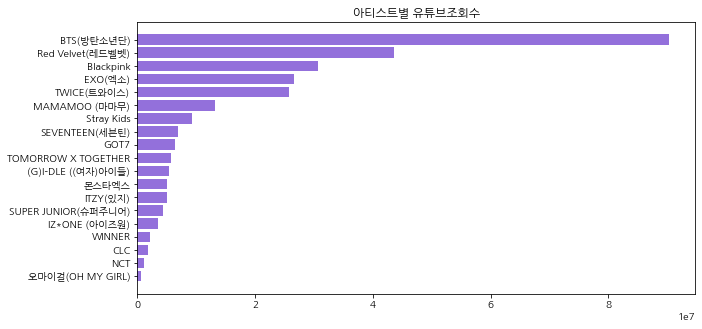

In [ ]:
plt.figure(figsize=(10, 5))
youtube_artist = youtube_artist.sort_values(by=['Views_CO'], ascending=True)
plt.barh(youtube_artist['Artist_NM'],youtube_artist['Views_CO'],color = 'mediumpurple')
plt.title("ÏïÑÌã∞Ïä§Ìä∏Î≥Ñ Ïú†ÌäúÎ∏åÏ°∞ÌöåÏàò")

->ÎØ∏Íµ≠, Î≤†Ìä∏ÎÇ®, Ïù∏ÎèÑÎÑ§ÏãúÏïÑ, Ìò∏Ï£º, ÏòÅÍµ≠Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ ÏïÑÌã∞Ïä§Ìä∏Î≥Ñ Ïú†ÌäúÎ∏å Ï°∞ÌöåÏàò Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥¥ÏïòÏäµÎãàÎã§. 1ÏúÑÏù∏ Î∞©ÌÉÑÏÜåÎÖÑÎã®Ïùò Ïú†ÌäúÎ∏å Ï°∞ÌöåÏàòÍ∞Ä 2ÏúÑÏù∏ Î†àÎìúÎ≤®Î≤≥ Ï°∞ÌöåÏàòÏùò ÏïΩ 2Î∞∞Î°ú ÎÇòÌÉÄÎÇò ÏúÑÏùò ÎßåÎÇòÍ≥† Ïã∂ÏùÄ ÌïúÎ•òÏä§ÌÉÄ Í∑∏ÎûòÌîÑÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏïïÎèÑÏ†ÅÏù∏ Ïù∏Í∏∞Î•º ÎÅåÍ≥†ÏûàÏùåÏùÑ ÌôïÏù∏ÌïòÏòÄÏäµÎãàÎã§.

In [ ]:
#Î∞©ÌÉÑÏÜåÎÖÑÎã® Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
BTSyoutube = youtube.Artist_NM	 == 'BTS(Î∞©ÌÉÑÏÜåÎÖÑÎã®)'
BTSyoutube = youtube[BTSyoutube]
BTSyoutube.head()


Survey_Date_DE Country_CD   Artist_NM  Views_CO                FILE_NAME  \
0      2019-12-16         au  BTS(Î∞©ÌÉÑÏÜåÎÖÑÎã®)     70131  KC_YOUTUBE_VIEW_AU_2019   
19     2019-12-17         au  BTS(Î∞©ÌÉÑÏÜåÎÖÑÎã®)     71281  KC_YOUTUBE_VIEW_AU_2019   
39     2019-12-18         au  BTS(Î∞©ÌÉÑÏÜåÎÖÑÎã®)     75787  KC_YOUTUBE_VIEW_AU_2019   
57     2019-12-19         au  BTS(Î∞©ÌÉÑÏÜåÎÖÑÎã®)     75789  KC_YOUTUBE_VIEW_AU_2019   
76     2019-12-20         au  BTS(Î∞©ÌÉÑÏÜåÎÖÑÎã®)     79626  KC_YOUTUBE_VIEW_AU_2019   

    BASE_YMD  
0       2019  
19      2019  
39      2019  
57      2019  
76      2019

In [ ]:
#ÏùºÏûêÎ≥ÑÎ°ú ÌîºÎ≤ó
BTSyoutube=BTSyoutube.pivot_table(values = 'Views_CO', index=['Survey_Date_DE'],aggfunc="sum")
BTSyoutube=BTSyoutube.reset_index()
BTSyoutube.head()
#pdf1 = pd.pivot_table(df,                # ÌîºÎ≤óÌï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
 #                    index = 'class',    # Ìñâ ÏúÑÏπòÏóê Îì§Ïñ¥Í∞à Ïó¥
  #                   columns = 'sex',    # Ïó¥ ÏúÑÏπòÏóê Îì§Ïñ¥Í∞à Ïó¥
   #                  values = 'age',     # Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©Ìï† Ïó¥
    #                 aggfunc = 'mean')   # Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥ÑÌï®Ïàò

Survey_Date_DE  Views_CO
0     2019-12-16   2998156
1     2019-12-17   2996070
2     2019-12-18   3084226
3     2019-12-19   3136151
4     2019-12-20   3600337

Text(0.5, 1.0, 'ÌïúÎã¨Í∞ÑÏùò Î≥ÄÌôîÏ∂îÏù¥')

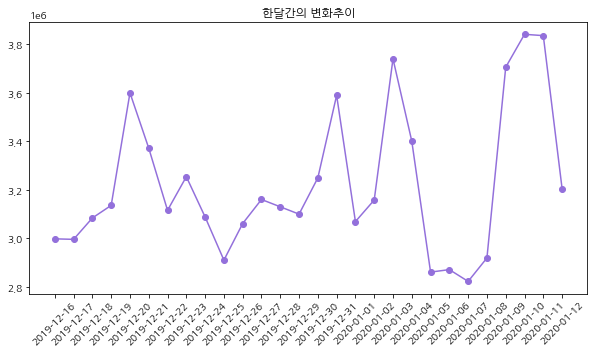

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(BTSyoutube["Survey_Date_DE"],BTSyoutube["Views_CO"], color='mediumpurple')
plt.scatter(BTSyoutube["Survey_Date_DE"],BTSyoutube["Views_CO"], color='mediumpurple')
plt.xticks(rotation=45)
plt.title("ÌïúÎã¨Í∞ÑÏùò Î≥ÄÌôîÏ∂îÏù¥")

*!!ÌùêÎ¶ÑÏóê Îî∞Îùº ÎπºÏïºÌï† Í∑∏ÎûòÌîÑ!!*

# 2. ÌïúÍµ≠Î∞©Î¨∏Î™©Ï†Å

- Ïô∏ÎûòÍ∞ù ÏûÖÍµ≠Î™©Ï†ÅÎ≥Ñ Îç∞Ïù¥ÌÑ∞
-Ï∂úÏ≤ò: kosis

In [ ]:
#ÏµúÍ∑º5ÎÖÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÉÅÎ∞òÍ∏∞ÏôÄ ÌïòÎ∞òÍ∏∞ ÏàòÏ†ïÌïú ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
visitall=pd.read_csv('ÏûÖÍµ≠Î™©Ï†ÅÏàòÏ†ïÏôÑ.csv')
visitall

Unnamed: 0   0        Ìï≠Î™©        Í≥Ñ       Í¥ÄÍ¥ë     ÏÉÅÏö©     Í≥µÏö©    Ïú†ÌïôÏó∞Ïàò       Í∏∞ÌÉÄ
0           1   1  2017 ÏÉÅÎ∞òÍ∏∞  6752005  5270000  90281  23596  146401  1221727
1           2   2  2017 ÌïòÎ∞òÍ∏∞  6583753  5145594  86790  31294  156251  1163824
2           3   3  2018 ÏÉÅÎ∞òÍ∏∞  7219374  5757408  85341  27351  165386  1183888
3           4   4  2018 ÌïòÎ∞òÍ∏∞  8127505  6656940  90206  33666  166625  1180068
4           5   5  2019 ÏÉÅÎ∞òÍ∏∞  8439214  6897907  87659  34065  184599  1234984
5           6   6  2019 ÌïòÎ∞òÍ∏∞  9063542  7534368  90786  40145  191062  1207181
6           7   7  2020 ÏÉÅÎ∞òÍ∏∞  2138576  1586960  22605  11030   88069   429912
7           8   8  2020 ÌïòÎ∞òÍ∏∞   380542    66511   6904   5541   30393   271193
8           9   9  2021 ÏÉÅÎ∞òÍ∏∞   420187    73424   8792   5901   33994   298076
9          10  10  2021 ÌïòÎ∞òÍ∏∞   546816   138422  12498  12784   46090   337022

Text(0.5, 1.0, 'ÌïúÍµ≠ÏûÖÍµ≠Î™©Ï†Å')

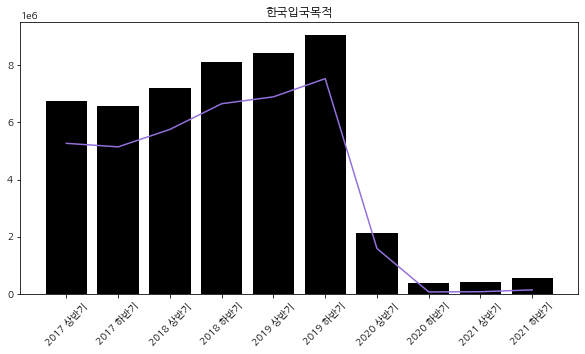

In [ ]:
a=visitall
plt.figure(figsize=(10, 5))
plt.bar(a["Ìï≠Î™©"],a["Í≥Ñ"], color='black')
plt.plot(a["Ìï≠Î™©"],a["Í¥ÄÍ¥ë"], color='mediumpurple')
plt.xticks(rotation=45)
plt.title("ÌïúÍµ≠ÏûÖÍµ≠Î™©Ï†Å")

In [ ]:
#visitall=visitall.set_index('ÏãúÏ†ê', inplace = True)

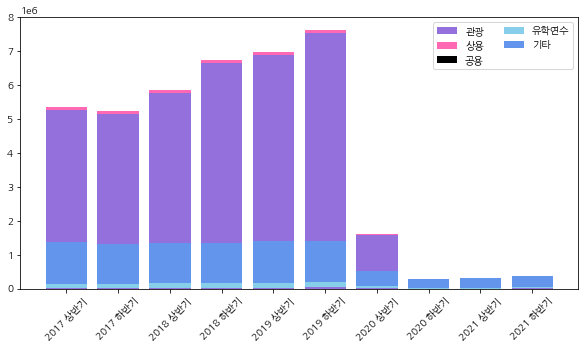

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(a["Ìï≠Î™©"],a["Í¥ÄÍ¥ë"],label = "Í¥ÄÍ¥ë",color = "mediumpurple")
plt.bar(a["Ìï≠Î™©"],a['ÏÉÅÏö©'],bottom = a["Í¥ÄÍ¥ë"],label = "ÏÉÅÏö©",color = "hotpink")
plt.bar(a["Ìï≠Î™©"],a['Í≥µÏö©'],bottom = a["ÏÉÅÏö©"],label = "Í≥µÏö©",color = "black")
plt.bar(a["Ìï≠Î™©"],a['Ïú†ÌïôÏó∞Ïàò'],bottom = a["Í≥µÏö©"],label = "Ïú†ÌïôÏó∞Ïàò",color = "skyblue")
plt.bar(a["Ìï≠Î™©"],a['Í∏∞ÌÉÄ'],bottom = a["Ïú†ÌïôÏó∞Ïàò"],label = "Í∏∞ÌÉÄ",color = "cornflowerblue")
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.show()


->Ïô∏ÎûòÍ∞ù ÏûÖÍµ≠Î™©Ï†ÅÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏó¨ ÏõîÎ≥ÑÎç∞Ïù¥ÌÑ∞Î•º ÏÉÅÎ∞òÍ∏∞ÏôÄ ÌïòÎ∞òÍ∏∞Î°ú ÎÇòÎàÑÏñ¥ Ï†ÑÏ≤òÎ¶¨Ìïú ÌõÑ, 5ÎÖÑÍ∞ÑÏùò ÏûÖÍµ≠Î™©Ï†ÅÎπÑÏú®ÏùÑ ÏÇ¥Ìé¥Î≥¥ÏïòÏäµÎãàÎã§. Í¥ÄÍ¥ë, Ïú†ÌïôÏó∞Ïàò, ÏÉÅÏö©, Í≥µÏö©, Í∏∞ÌÉÄ Ï§ë Í¥ÄÍ¥ëÎ™©Ï†ÅÏù¥ ÌïúÍµ≠ÏûÖÍµ≠Ïóê Í∞ÄÏû• ÌÅ∞ ÎπÑÏú®ÏùÑ Ï∞®ÏßÄÌïòÏòÄÏäµÎãàÎã§. Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ ÏΩîÎ°úÎÇòÍ∞Ä ÌÑ∞ÏßÄÍ∏∞ Ï†ÑÏù∏ 2019ÎÖÑÌïòÎ∞òÍ∏∞ÍπåÏßÄ Íæ∏Ï§ÄÌûà Í¥ÄÍ¥ëÏô∏ÎûòÍ∞ùÏù¥ Ï¶ùÍ∞ÄÌïòÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.  

->ÏµúÍ∑º, Ï†êÏ∞® ÏÑ∏Í≥ÑÏ†ÅÏúºÎ°ú Í∑úÏ†úÍ∞Ä ÏôÑÌôîÎêòÍ≥† ÏûàÍ≥† Í¥ÄÍ¥ëÏ†àÏ∞®Í∞Ä ÌíÄÎ¶¨Í≥† ÏûàÏäµÎãàÎã§. ÎòêÌïú ÏµúÍ∑º Ïò§ÏßïÏñ¥Í≤åÏûÑ, Í∏∞ÏÉùÏ∂©, K-POPÎì± ÌïúÍµ≠Ïóê ÎåÄÌïú Í¥ÄÏã¨Ïù¥ ÎçîÏö± ÎäòÏñ¥ÎÇò Í¥ÄÍ¥ëÏùÑ ÏúÑÌïú ÌïúÍµ≠ÏûÖÍµ≠Í∞ùÏù¥ Ï¶ùÍ∞ÄÌï† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê©ÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥Îü¨Ìïú Í¥ÄÏã¨ÏùÑ Ï†ÑÌÜµÏúºÎ°ú Ïù¥ÎÅå Ïàò ÏûàÎäî Î∞©ÏïàÏùÑ Í≥†ÎØºÌï¥Î≥¥ÏïòÏäµÎãàÎã§.

# 3. Ïù∏Ïä§ÌÉÄ ÌÅ¨Î°§ÎßÅ

## - ÌÅ¨Î°§ÎßÅ ÏΩîÎìú


- ÏôúÏù∏ÏßÄ Î™®Î•¥Í≤†ÏúºÎÇò ÏΩîÎû©ÏóêÏÑú ÏïàÎèåÏïÑÍ∞ÄÎäîÎç∞.. Ï£ºÌîºÌÑ∞Î°ú ÌÅ¨Î°§ÎßÅÌï¥ÏÑú ÌååÏùº ÏÉùÏÑ±
-- ÏΩîÎìúÎäî ÏïÑÎûòÏôÄ Í∞ôÏùå
-- Ï¥ù 1149Í∞ú! time.sleep() ÏÇ¨Ïö©ÌñàÏúºÎÇò Í≥ÑÏ†ïÏ†ïÏßÄÏ£ºÏùò

In [ ]:
'''
!pip install selenium
'''

In [ ]:
'''
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re
import time
'''

In [ ]:
'''
#Ìï®ÏàòÏ†ïÏùò:Í≤ÄÏÉâÏñ¥ Ï°∞Í±¥Ïóê Îî∞Î•∏ urlÏÉùÏÑ±
def insta_searching(word):
  url = "https://www.instagram.com/explore/tags/" + str(word)
  return url

#ÏãúÏ∞®ÎëêÍ∏∞
def select_first(driver):
  first = driver.find_elements_by_css_selector("div._aagw")[0]
  first.click()
  time.sleep(3)
'''

In [ ]:
'''
import re
from bs4 import BeautifulSoup

#Ìï®ÏàòÏ†ïÏùò: Î≥∏Î¨∏ÎÇ¥Ïö©, ÏûëÏÑ±ÏùºÏûê, Ï¢ãÏïÑÏöîÏàò, ÏúÑÏπò, Ìï¥ÏãúÌÉúÍ∑∏ Í∞ÄÏ†∏Ïò§Í∏∞
def get_content(driver):
  html = driver.page_source
  soup = BeautifulSoup(html,'lxml')

  #Î≥∏Î¨∏ÎÇ¥Ïö©
  try:
    content = soup.select('div._a9zr')[0].text
  except:
    content = ''
  #Ìï¥ÏãúÌÉúÍ∑∏
  tags = re.findall(r'#[^\s#,\\]+',content)

  #ÏûëÏÑ±ÏùºÏûê
  date = soup.select('time._aaqe')[0]['datetime'][:10]

  #Ï¢ãÏïÑÏöî
  try:
    like = soup.select('section._aam_._aat4')[0].findAll('span')[-1].text
  except:
    like = 0

  #ÏúÑÏπò
  try:
    place = soup.select('div._aaql')[0].text
  except:
    place = ''

  data=[content,date,like,place,tags]
  return data

#Ìï®ÏàòÏ†ïÏùò
def move_next(driver):
  right = driver.find_element_by_css_selector("div._aaqg._aaqh")
  right.click()
  time.sleep(3)
  '''

In [ ]:
'''
#driver.get(url)ÏùÑ ÌÜµÌï¥ Í≤ÄÏÉâÌéòÏù¥ÏßÄ Ï†ëÏÜç
#targetÎ≥ÄÏàòÏóê ÌÅ¨Î°§ÎßÅÌï† Í≤åÏãúÍ∏ÄÏùò ÏàòÎ•º Î∞îÏù∏Îî©


driver = webdriver.Chrome(executable_path='C:/Users/rlawndms/Desktop/boaz/[202207]Î¨∏ÌôîÍ≥µÎ™®Ï†Ñ/chromedriver.exe')
driver.get('https://www.instagram.com')
time.sleep(3)

#Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Î°úÍ∑∏Ïù∏
email = 'rlawndms99'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password='ju990407*insta'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

time.sleep(5)

#Í≤åÏãúÎ¨ºÏ°∞ÌöåÌï† Í≤ÄÏÉâ ÌÇ§ÏõåÎìú ÏûÖÎ†• ÏöîÏ≤≠
word = input("Í≤ÄÏÉâÏñ¥ ÏûÖÎ†• : ")
word = str(word)
url = insta_searching(word)

#Í≤ÄÏÉâÍ≤∞Í≥ºÌéòÏù¥ÏßÄ
driver.get(url)
time.sleep(8)

#Ï≤´Î≤àÏß∏Í≤åÏãúÎ¨º ÌÅ¥Î¶≠
select_first(driver)

#Îç∞Ïù¥ÌÑ∞ÏàòÏßëÏãúÏûë
results = []
#ÏàòÏßëÌï†Í≤åÏãúÎ¨ºÏùò Ïàò
target = 2000
for i in range(target):

  try:
    data = get_content(driver)
    results.append(data)
    move_next(driver)
  except:
    time.sleep(2)
    move_next(driver)

print(results[:2])
'''

In [ ]:
'''
import pandas as pd
import numpy as np
from datetime import datetime

date = datetime.today().strftime('%Y-%m-%d')

results_df = pd.DataFrame(results)
results_df.columns = ['content','date','like','place','tags']
results_df.to_excel(date + '_about '+ word +' insta crawling(btstour).xlsx')
'''

## - #Î∞©ÌÉÑÌà¨Ïñ¥

In [ ]:
btstour = pd.read_excel('2022-07-17_about ·Ñá·Ö°·Üº·Ñê·Ö°·Ü´·Ñê·ÖÆ·Ñã·Ö• insta crawling.xlsx')
btstour.head()

Unnamed: 0                                            content        date  \
0           0                         hyeminn.nÌò∏ÎπÑÎûë Í∞ôÏùÄ ÏûêÎ¶¨ÏóêÏÑúüì∏üíú113Ï£º  2020-05-12   
1           1  startrip.global‚úîÔ∏èV went here after Busan tour‚†Ä...  2020-02-06   
2           2  startrip.globalBTS The Min‚ÄôsA famous cafe wher...  2019-11-20   
3           3  80.yuna.j#Ï≤´Ï§Ñüëã#Ïù¥Ïò§Îãπ#Ï†ÑÏ£ºÌïúÏò•ÎßàÏùÑÏàôÏÜå#ÏôÄÏö∞ÎÑàÎ¨¥Ï¢ãÏïÑÏù¥ÏÅúÏàôÏÜå Ïû°ÏïÑÏ§Ä ÏÑ†ÏûêÏïº ...  2022-04-24   
4           4  seung_asarabiaü•∞ÏïàÎÖïÌïòÏÑ∏Ïöî Ïã†Ïù∏Í∞ÄÏàò Ìï†Ïãú, Ïïó ÏïÑÎãà ÌôïÎßàÏî®- ÏûÖÎãàÎã§!He...  2019-12-23   

     like         place                                               tags  
0     805          ÏÑ±ÏàòÏó∞Î∞©                                                 []  
1   2,896           NaN  ['#Î∞©ÌÉÑÏÜåÎÖÑÎã®', '#Î∞©ÌÉÑÌà¨Ïñ¥', '#btstour', '#seoultour', ...  
2   3,900       Í∞ïÎÇ®Íµ¨ Ïã†ÏÇ¨Îèô  ['#bts', '#themins', '#ÎçîÎØºÏä§', '#Î∞©ÌÉÑÌà¨Ïñ¥', '#hallyu...  
3      67           Ïù¥Ïò§Îãπ  ['#Ï≤´Ï§Ñüëã', '#Ïù¥Ïò§Îãπ', '#Ï†ÑÏ£ºÌïúÏò•ÎßàÏùÑÏàôÏÜå', '#ÏôÄÏö∞ÎÑàÎ¨¥Ï¢ãÏïÑÏù¥ÏÅúÏàôÏÜå', '...  
4  12,598  HOUSE of BTS            ['#Î∞©ÌÉÑÏÜåÎÖÑÎã®', '#houseofbts', '#halseyÏàòÏ†ïÎê®']

In [ ]:
#ÎÇ†Ïßú, Ï¢ãÏïÑÏöîÏàò, Ïû•ÏÜå Ï∂îÏ∂ú
btstour_1 = btstour[['date','like','place']]

In [ ]:
#Ïû•ÏÜåÍ≤∞Ï∏°Í∞í Ï†úÍ±∞: 1150->604Í∞ú
btstour_1 = btstour_1.dropna(axis=0)
btstour_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 1144
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    604 non-null    object
 1   like    604 non-null    object
 2   place   604 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


In [ ]:
#Ïû•ÏÜåÎ≥Ñ Í∞úÏàò ÌôïÏù∏
btstour_1['place'].value_counts().head(20)

Ïû†Ïã§ Ï£ºÍ≤ΩÍ∏∞Ïû•                        55
Íµ≠Î¶ΩÏ§ëÏïôÎ∞ïÎ¨ºÍ¥Ä                        21
Î∞©ÌÉÑÏÜåÎÖÑÎã® Î≤ÑÏä§Ï†ïÎ•òÏû• BTS Bus Stop       13
Ïä§ÎàÑÌîºÍ∞ÄÎì†                          10
ÏùºÏòÅÏó≠ (Iryeong Stn.)              9
Ïú†Ï†ïÏãùÎãπ                            9
ÎßπÎ∞©Ìï¥ÏàòÏöïÏû•                          9
ÏùÑÏßÄÎã§Î∞©                            8
ÌôòÏÉÅÏùòÎÇòÎùº ÏóêÎ≤ÑÎûúÎìú                      8
ÏïÑÏõêÍ≥†ÌÉù                            8
ÏÑúÏö∏ÏãúÎ¶ΩÎØ∏Ïà†Í¥Ä Seoul Museum of Art     7
Í∞ïÏõêÎèÑ ÏÇºÏ≤ô ÎßπÎ∞©Ìï¥ÏàòÏöïÏû•                   7
ÏÑúÏö∏Ïà≤                             7
Î¨∏Ïèò                              6
ÏÑúÏö∏                              6
HYBE                            6
ÌïúÍµ≠ÎåÄÏ§ëÏùåÏïÖÎ∞ïÎ¨ºÍ¥Ä                       6
Íµ¨ÌïòÏö∞Ïä§ - Koohouse                 6
ÎåÄÏó∞Îèô Î©îÍ∑∏ÎÑ§Ïù¥Ìä∏                       6
Êù±‰∫¨„Çπ„Ç´„Ç§„ÉÑ„É™„Éº / Tokyo Skytree        5
Name: place, dtype: int64

In [ ]:
#ÎÇòÌÉÄÎÇúÏû•ÏÜåÍ∞úÏàò Ïó¥ Ï∂îÍ∞Ä
btstour_1['placeCounts'] = btstour_1.place.groupby(btstour_1.place).transform('count')
btstour_1.head()

date    like         place  placeCounts
0  2020-05-12     805          ÏÑ±ÏàòÏó∞Î∞©            2
2  2019-11-20   3,900       Í∞ïÎÇ®Íµ¨ Ïã†ÏÇ¨Îèô            1
3  2022-04-24      67           Ïù¥Ïò§Îãπ            1
4  2019-12-23  12,598  HOUSE of BTS            2
5  2019-12-23     948  HOUSE of BTS            2

In [ ]:
#1Í∞úÎßåÎÇòÏò® Ïû•ÏÜåÎì§ÏùÄ ÏÇ≠Ï†ú 604Í∞ú->402Í∞ú
btstour_1 = btstour_1[btstour_1['placeCounts'] >= 2]
#ÎÇ†ÏßúÌòïÏúºÎ°ú Î≥ÄÌôò
btstour_1['date']= btstour_1['date'].astype('str')
btstour_1['date'] = pd.to_datetime(btstour_1['date'])
btstour_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 1144
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         402 non-null    datetime64[ns]
 1   like         402 non-null    object        
 2   place        402 non-null    object        
 3   placeCounts  402 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.7+ KB


In [ ]:
#3Í∞úÏù¥ÏÉÅ ÎÇòÏò® Ïû•ÏÜåÎì§ ->316Í∞ú
btstour_1 = btstour_1[btstour_1['placeCounts'] >= 3]
btstour_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 7 to 1142
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         316 non-null    datetime64[ns]
 1   like         316 non-null    object        
 2   place        316 non-null    object        
 3   placeCounts  316 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 12.3+ KB


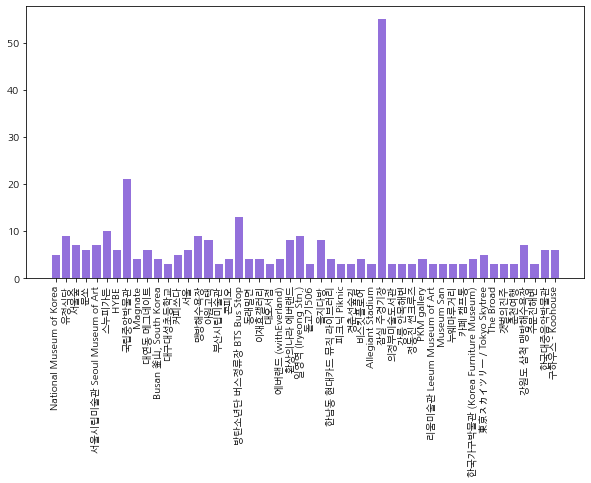

In [ ]:
fm._rebuild()
a = btstour_1
plt.figure(figsize=(10, 5))
plt.bar(a["place"],a["placeCounts"], color='mediumpurple')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#5Í∞úÏù¥ÏÉÅ ÎÇòÏò® Ïû•ÏÜåÎì§
btstour_1 = btstour_1[btstour_1['placeCounts'] >= 5]
btstour_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 7 to 1135
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         222 non-null    datetime64[ns]
 1   like         222 non-null    object        
 2   place        222 non-null    object        
 3   placeCounts  222 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 8.7+ KB


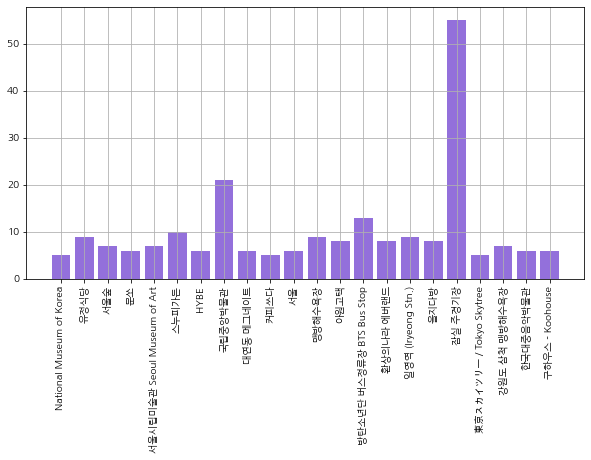

In [ ]:
a = btstour_1
plt.figure(figsize=(10, 5))
plt.bar(a["place"],a["placeCounts"], color='mediumpurple')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

-> 5Í∞úÏù¥ÏÉÅ Îì±Ïû•Ìïú Ïû•ÏÜåÎ•º Ï∂îÏ∂úÌïòÏó¨ Îì±Ïû•ÎπàÎèÑ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥¥ÏïòÏùÑÎïå, Ïû†Ïã§Í≤ΩÍ∏∞Ïû•Ïù¥ 1ÏúÑ, Íµ≠Î¶ΩÏ§ëÏïôÎ∞ïÎ¨ºÍ¥ÄÏù¥ 2ÏúÑ, Î∞©ÌÉÑÏÜåÎÖÑÎã® Î≤ÑÏä§Ï†ïÎ•òÏû•Ïù¥ 3ÏúÑÎ•º Ï∞®ÏßÄÌïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïû†Ïã§Ï£ºÍ≤ΩÍ∏∞Ïû•Ïùò Í≤ΩÏö∞ Î∞©ÌÉÑÏÜåÎÖÑÎã® ÏΩòÏÑúÌä∏Ìà¨Ïñ¥Î°úÏù∏Ìïú Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. Í∑∏Îü¨ÎÇò **Î≤ÑÏä§Ï†ïÎ•òÏû•(Î∞©ÌÉÑÏÜåÎÖÑÎã®Ïùò Ïï®Î≤îÏÇ¨ÏßÑÏóê Îì±Ïû•)Í≥º Î∞ïÎ¨ºÍ¥Ä Î∞è ÎØ∏Ïà†Í¥ÄÏùò Îì±Ïû•**ÏùÑ ÌÜµÌï¥ **Î∞©ÌÉÑÏÜåÎÖÑÎã®Ïùò Ïù∏Í∏∞Í∞Ä ÏΩòÏÑúÌä∏Ïô∏Ïùò Í¥ÄÍ¥ëÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÍ≥† ÏûàÏùå**ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§. 

->Ïû†Ïã§ Ï£ºÍ≤ΩÍ∏∞Ïû• Í∑ºÏ≤òÏóê Ï†ÑÌÜµ ÌåùÏóÖÏä§ÌÜ†Ïñ¥ Î∞è Ï≤¥ÌóòÍ¥ÄÏùÑ Ïó¨Îäî Î∞©Î≤ï

->ÎÆ§ÎπÑÏ¥¨ÏòÅÏßÄÌÖåÎßàÎ°ú Í¥ÄÍ¥ëÏΩòÌÖêÏ∏† Ï†úÏûëÍ∞ÄÎä•

## - #hangeul

In [ ]:
#ÌÅ¨Î°§ÎßÅÌååÏùº Î∂àÎü¨Ïò§Í∏∞->497Í∞ú
hangeul = pd.read_excel('2022-07-20_about hangeul insta crawling.xlsx')
hangeul.head()

Unnamed: 0                                            content        date  \
0           0  halokoreaaclassBiasanya sih yang gini gini cep...  2022-07-06   
1           1  rini_archive#ÏÖÄÌîÑÌÉêÍµ¨ÏùºÏßÄÏñ¥Îñ§ Í∏∞Î°ù ÏπúÍµ¨Ïùò Í≥ÑÏ†ïÏóêÏÑú ÏÖÄÌîÑÌÉêÍµ¨ÏùºÏßÄÎùºÎäî Í∏∞Î°ùÏùÑ...  2022-06-24   
2           2  learnkorean_everydayThe native pronunciation i...  2022-07-19   
3           3  na_nim_gallery#Ìã∞Î≤†Ìä∏ÏÜçÎã¥ Ï§ë[ÎÇ¥ÏùºÍ≥º Îã§ÏùåÏÉùÏ§ëÏóê Ïñ¥ÎäêÍ≤ÉÏù¥ Î®ºÏ†Ä Ï∞æÏïÑÏò¨ÏßÄ ...  2022-07-18   
4           4  koreanbamÍ∞ÄÎÅîÏùÄ Î¨¥Ï±ÖÏûÑÌïòÍ≤å Îì§Î¶¨Îäî ÎßêÏûÖÎãàÎã§!#tolearnkorean #·Ñí·Ö°...  2022-07-14   

     like    place                                               tags  
0  10,281      NaN  ['#belajarbahasakorea', '#bahasakorea', '#baha...  
1   3,610      NaN                                      ['#ÏÖÄÌîÑÌÉêÍµ¨ÏùºÏßÄÏñ¥Îñ§']  
2     280      NaN  ['#learnkorean', '#learnkoreanlanguage', '#lea...  
3     239  Ï†ÑÎùºÎ∂ÅÎèÑ Ï†ÑÏ£º  ['#Ìã∞Î≤†Ìä∏ÏÜçÎã¥', '#Ïä¨Í∏∞Î°≠Í≥†Ïã∂ÏùÄÏ∫òÎ¶¨ÏÉùÌôú', '#ÎîîÏßÄÌÑ∏Ï∫òÎ¶¨Í∑∏ÎùºÌîº', '#ÎîîÏßÄÌÑ∏ÎìúÎ°ú...  
4   1,204      NaN  ['#tolearnkorean', '#·Ñí·Ö°·Ü´·ÑÄ·ÖÆ·Ü®·Ñã·Ö•·Ñá·Ö¢·Ñã·ÖÆ·ÑÄ·Öµ', '#·Ñí·Ö°·Ü´·ÑÄ·ÖÆ·Ü®...

In [ ]:
#ÎÇ†ÏßúÌòïÏúºÎ°ú Î≥ÄÌôò
hangeul['date']= hangeul['date'].astype('str')
hangeul['date'] = pd.to_datetime(hangeul['date'])


In [ ]:
#Ìï¥ÏãúÌÉúÍ∑∏ drama, bts, kpop, kdrama, squidgameÎ•º Ìè¨Ìï®ÌïòÎäî Í≤åÏãúÎ¨º Ï∂îÏ∂ú->118Í∞ú
hangeul_filter =hangeul[hangeul['tags'].str.contains('drama|bts|kpop|kdrama|squidgame')]
#Í≤åÏãúÍ∏ÄÏàò ÌôïÏù∏
print('Í≤åÏãúÍ∏Ä Ïàò :',hangeul.shape[0])
print('Í≤åÏãúÍ∏Ä Ïàò :',hangeul_filter.shape[0])

Í≤åÏãúÍ∏Ä Ïàò : 497
Í≤åÏãúÍ∏Ä Ïàò : 118


->#hangeulÏùÑ Ìè¨Ìï®Ìïú Í≤åÏãúÍ∏Ä ***497Í∞ú*** Ï§ë #drama, #bts, #kpop, #kdrama, #squidgameÎ•º Ìè¨Ìï®Ìïú Í≤åÏãúÍ∏ÄÏùÄ ***118Í∞ú***Î°ú ***Ï†ÑÏ≤¥Í≤åÏãúÍ∏ÄÏùò ÏïΩ 1/4***Î•º Ï∞®ÏßÄÌïòÏòÄÏäµÎãàÎã§. Ïù¥Î•º ÌÜµÌï¥ ÌïúÍ∏ÄÎ°ú Ïù¥Ïñ¥ÏßÑ ÌïúÎ•òÏùò Ïù∏Í∏∞Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

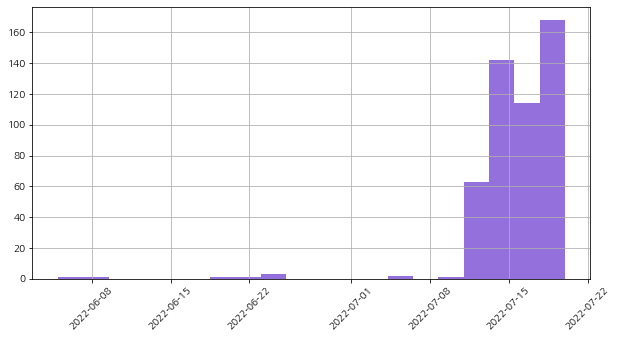

In [ ]:
#Ï†ÑÏ≤¥Í≤åÏãúÍ∏Ä
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.hist(hangeul['date'],bins =20,color='mediumpurple')
plt.xticks(rotation=45)
plt.show()

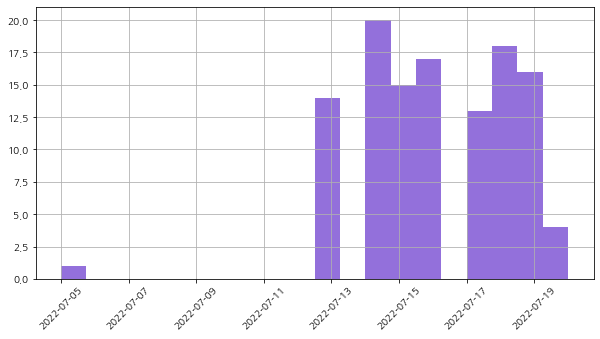

In [ ]:
#filtering Í≤åÏãúÍ∏Ä
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.hist(hangeul_filter['date'],bins =20,color='mediumpurple')
plt.xticks(rotation=45)
plt.show()

## - #btshanbok
- hanbok ÌÇ§ÏõåÎìúÎ°ú Í≤ÄÏÉâÌñàÏùÑ Îïå ÌïúÎ≥µÎåÄÏó¨, Ï†úÏûëÍ≥º Í∞ôÏùÄ Í≤åÏãúÍ∏ÄÏù¥ Ï£ºÎ•º Ï∞®ÏßÄÌñàÏúºÎØÄÎ°ú ÌïúÎ•òÏù∏Í∏∞ÏôÄ ÌïúÎ≥µ(ÌïúÍµ≠Ï†ÑÌÜµÎ¨∏Ìôî)Ïùò Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ btshanbokÏúºÎ°ú ÌÇ§ÏõåÎìú ÏÑ§Ï†ï 

In [ ]:
hanbok = pd.read_excel('2022-07-20_about btshanbok insta crawling.xlsx')
hanbok.head()

Unnamed: 0                                            content        date  \
0           0  seraphxjiminJimin wearing hanbok while taking ...  2022-05-02   
1           1  yoo_minsugaWhat‚Äôs your favorite name?...Follow...  2021-05-04   
2           2  moleoncollarbonejimin–ù–∞—Å–ª–µ–¥–Ω—ã–π –ø—Ä–∏–Ω—Ü –ß–æ—Å–æ–Ω–∞ - ...  2021-09-24   
3           3         jinnie.jin_Happy LUNAR NEW YEAR üåïüíúüíìÏ¶êÏÑ§‚ùÑÔ∏è24Ï£º  2022-01-31   
4           4                               sujipark01üíìÏàòÏ†ïÎê®¬†¬∑¬†63Ï£º  2021-04-30   

    like                 place  \
0  3,360                   NaN   
1  1,806                   NaN   
2    119                   NaN   
3    842  Happy Lunar New Year   
4  1,381                   NaN   

                                                tags  
0  ['#btsinthesoop', '#inthesoop', '#jiminintheso...  
1  ['#jimin', '#jiminbts', '#jiminpark', '#jiminc...  
2                                                 []  
3                                                 []  
4                                                 []

In [ ]:
#ÎÇ†ÏßúÌòïÎ≥ÄÌôò
hanbok['date']= hanbok['date'].astype('str')
hanbok['date'] = pd.to_datetime(hanbok['date'])
#Í≤åÏãúÍ∏ÄÏàò ÌôïÏù∏
print('Í≤åÏãúÍ∏Ä Ïàò :',hanbok.shape[0])

Í≤åÏãúÍ∏Ä Ïàò : 202


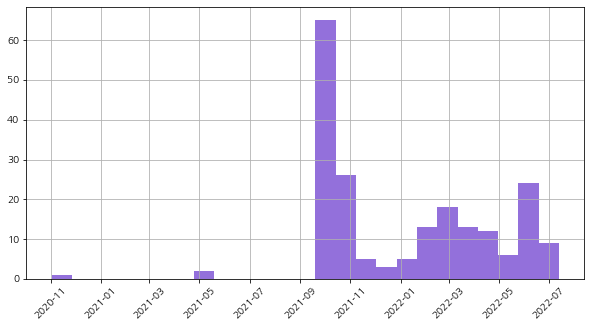

In [ ]:
#btsÌïúÎ≥µ Ï†ÑÏ≤¥Í≤åÏãúÍ∏ÄÎÇ†ÏßúÎ∂ÑÌè¨ÎèÑ
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.hist(hanbok['date'],bins =25,color='mediumpurple')
plt.xticks(rotation=45)
plt.show()

-> **2020.11**ÏóêÎäî Î∞©ÌÉÑÏÜåÎÖÑÎã®Ïùò Ïï®Î≤î "BE"Í∞Ä, **2021.05**ÏóêÎäî Ïï®Î≤î "Butter"Í∞Ä Î∞úÎß§ÎêòÏóàÍ≥† **2021.09**Îäî Î∞©ÌÉÑÏÜåÎÖÑÎã®Ïùò ÎÖ∏Îûò "butter"Í∞Ä  ÎπåÎ≥¥Îìú Ìï´100 Ï∞®Ìä∏ÏóêÏÑú Îã§Ïãú 1ÏúÑÎ•º Ï∞®ÏßÄÌïòÏó¨ ÎπÑÏó∞ÏÜç 10Ï£º 1ÏúÑÎùºÎäî Í∏∞Î°ùÏùÑ ÏÑ∏Ïö¥ ÏãúÍ∏∞ Î∞è ‚òÖÏò§ÏßïÏñ¥ Í≤åÏûÑÏù¥ ÎÑ∑ÌîåÎ¶≠Ïä§ Ï†ÑÏÑ∏Í≥Ñ 1ÏúÑÎùºÎäî Í∏∞Î°ùÏùÑ ÏÑ∏Ïö¥ ÏãúÍ∏∞‚òÖÏûÖÎãàÎã§.

->Îî∞ÎùºÏÑú Î∞©ÌÉÑÏÜåÎÖÑÎã®Ïùò Ïù∏Í∏∞Ïóê Îî∞Îùº ÌïúÎ≥µÏóê ÎåÄÌïú Í¥ÄÏã¨ ÎòêÌïú Ï¶ùÍ∞ÄÌñàÏùåÏùÑ ÌôïÏù∏ÌïòÏòÄÏäµÎãàÎã§.



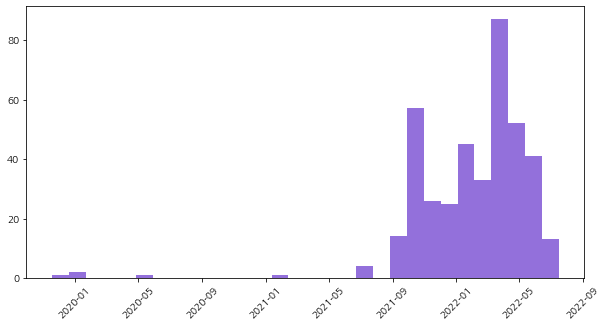

In [ ]:
#btstourÍ≤åÏãúÍ∏Ä ÎÇ†ÏßúÎ≥Ñ Î∂ÑÌè¨(1Í∞úÎßå ÎÇòÏò® Ïû•ÏÜåÎì§ÏùÄ ÏÇ≠Ï†ú)
plt.figure(figsize=(10, 5))
plt.hist(btstour_1['date'],bins =30,color='mediumpurple')
plt.xticks(rotation=45)
plt.show()


* #Î∞©ÌÉÑÌà¨Ïñ¥ Í≤åÏãúÍ∏Ä ÎÇ†ÏßúÎ≥Ñ Î∂ÑÌè¨ÎèÑ

->ÎÇ†ÏßúÎ≥Ñ Î∂ÑÌè¨ÎèÑÎ•º ÏÇ¥Ìé¥Î≥¥ÏïòÏùÑ Îïå, 2019ÎÖÑ 12ÏõîÎ∂ÄÌÑ∞ ÌòÑÏû¨ÍπåÏßÄÏùò Í≤åÏãúÍ∏ÄÏù¥ ÌÅ¨Î°§ÎßÅÎêòÏóàÏúºÎ©∞ 2021ÎÖÑ 9Ïõî Ïù¥ÌõÑÎ∂ÄÌÑ∞ Î∞©ÌÉÑÏÜåÎÖÑÎã® ÌÖåÎßàÏùò Ïó¨Ìñâ Î∞è Î∞©Î¨∏Ïù¥ ÌôúÏÑ±ÌôîÎêòÏóàÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

->ÏúÑÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ‚òÖ2021-09ÏùÄ ÎÑ∑ÌîåÎ¶≠Ïä§ Ïò§ÏßïÏñ¥Í≤åÏûÑÏù¥ Ïó≠ÎåÄ Í∞ÄÏû• ÎßéÏùÄ ÏãúÏ≤≠Í∞ÄÍµ¨ÏàòÎ•º Í∏∞Î°ùÌïú ÏãúÍ∏∞ÏûÖÎãàÎã§. 2021-10Ïóê ÎÑ∑ÌîåÎ¶≠Ïä§Í∞Ä Ïò§ÏßïÏñ¥Í≤åÏûÑÏù¥ ÏÑ∏Í≥ÑÏóêÏÑú Í∞ÄÏû• ÎßéÏùÄ ÏãúÏ≤≠Í∞ÄÍµ¨ÏàòÎ•º Í∏∞Î°ùÌïú ÏΩòÌÖêÏ∏†ÎùºÍ≥† Î∞úÌëúÌïòÏòÄÎäîÎç∞, Ìï¥Îãπ Ìù•ÌñâÏù¥ Í≤åÏãúÍ∏Ä Í∞úÏàòÏóêÎèÑ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπú Í≤ÉÏù¥Îã§..!‚òÖ




- squidgame, squidgamechallenge, squidgametourÎ°ú ÌÇ§ÏõåÎìú Í≤ÄÏÉâÌï¥Î≥¥Î†§ÌñàÏúºÎÇò ÎåÄÎ∂ÄÎ∂Ñ Í∏∞ÏÇ¨Í∏Ä Ïä§ÌÅ¨Îû©Ïù¥Í±∞ÎÇò Î∞∞Ïö∞Ïóê Í¥ÄÌïú Í≤åÏãúÍ∏ÄÏù¥ÏóàÏùå

- Ïû•ÏÜåÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ïò§ÏßïÏñ¥Í≤åÏûÑÏúºÎ°ú Ïù∏Ìïú ÌïúÍµ≠Î∞©Î¨∏Î≥¥Îã§Îäî(Ïä§ÌäúÎîîÏò§Ï¥¨ÏòÅÏù¥ÏóàÏúºÎãàÍπå), Í∞ÅÏûê ÎÇòÎùºÏóêÏÑú Ïò§ÏßïÍ±∞Í≤åÏûÑÌÖåÎßàÎ°úÏö¥ÏòÅÎêòÎäî Ïû•ÏÜåÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ.

- Îã¨Í≥†ÎÇòÏóê ÎåÄÌïú Í¥ÄÏã¨ Î∞è Ï†ÑÌÜµÎÜÄÏù¥ Í¥ÄÏã¨ÏùÄ ÏûàÏùÑ Í≤É Í∞ôÍ∏∞Îäî ÌïúÎç∞.. Ïù∏Ïä§ÌÉÄÌÅ¨Î°§ÎßÅÌäπÏÑ±ÏÉÅ ÎßéÏùÄ Í∏∞ÏÇ¨Í∏Ä Í∞ÄÏö¥Îç∞ÏÑú Ï∞æÍ∏∞Í∞Ä ÌûòÎì§ÎìØ

#  4. Í¥ÄÍ¥ëÏàòÏöî
* Ï∂úÏ≤ò: ÌïúÍµ≠Í¥ÄÍ¥ëÍ≥µÏÇ¨ datalab

In [ ]:
koreaentry = pd.read_excel('·Ñí·Ö°·Ü´·ÑÄ·ÖÆ·Ü®·Ñã·Öµ·Ü∏·ÑÄ·ÖÆ·Ü®·Ñã·Ö¨·ÑÖ·Ö¢·ÑÄ·Ö™·Ü´·ÑÄ·Ö™·Üº_19_22.xlsx')
koreaentry.head()

Ïõî  Íµ≠Í∞Ä     2019     2020   2021      2022
0  1  Ï†ÑÏ≤¥  1104803  1272708  58397   81851.0
1  2  Ï†ÑÏ≤¥  1201802   685212  65582   99999.0
2  3  Ï†ÑÏ≤¥  1535641    83497  74604   96768.0
3  4  Ï†ÑÏ≤¥  1635066    29415  70112  127919.0
4  5  Ï†ÑÏ≤¥  1485684    30806  74463  175922.0

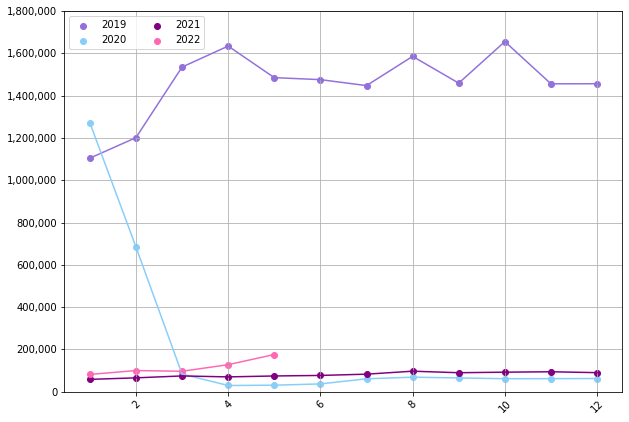

In [ ]:
a= koreaentry
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(a['Ïõî'],a[2019], color='mediumpurple')
plt.plot(a['Ïõî'],a[2020], color='lightskyblue')
plt.plot(a['Ïõî'],a[2021], color='purple')
plt.plot(a['Ïõî'],a[2022], color='hotpink')
plt.scatter(a['Ïõî'],a[2019], color='mediumpurple',label = '2019')
plt.scatter(a['Ïõî'],a[2020], color='lightskyblue',label = '2020')
plt.scatter(a['Ïõî'],a[2021], color='purple', label = '2021')
plt.scatter(a['Ïõî'],a[2022], color='hotpink',label = '2022')
plt.ylim([0,1800000]) 
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='best', ncol=2)
plt.xticks(rotation=45)
plt.show()

-> 2019, 2020, 2021, 2022Ïùò ÏõîÎ≥Ñ ÌïúÍµ≠ÏûÖÍµ≠Ïô∏ÎûòÍ∞ù(+Ìï¥Ïô∏ Í±∞Ï£º ÌïúÍµ≠Ïù∏ Ìè¨Ìï®) ÏàòÏùò Î≥ÄÌôî Í∑∏ÎûòÌîÑÏûÖÎãàÎã§. ÏΩîÎ°úÎÇò Ï†ÑÏù∏ 2019ÎÖÑÏóêÎäî Ï†êÏ∞® ÌïúÍµ≠ÏûÖÍµ≠Ïô∏ÎûòÍ∞ùÏù¥ Ï¶ùÍ∞ÄÌïòÏòÄÏúºÎÇò 2020ÎÖÑ 1Ïõî Ïù¥ÌõÑ ÏΩîÎ°úÎÇòÎ°ú Ïù∏Ìï¥ Í∏âÍ≤©ÌïòÍ≤å Í∞êÏÜåÌïòÏòÄÏäµÎãàÎã§. Ïù¥ÌõÑ Í∑∏ ÏàòÍ∞Ä Î≥ÄÌôîÌïòÏßÄ ÏïäÎã§Í∞Ä 2022ÎÖÑ ÏΩîÎ°úÎÇò Í∑úÏ†úÏ†ïÏ±ÖÏù¥ ÏôÑÌôîÎê®Ïóê Îî∞Îùº ÏûÖÍµ≠Ïô∏ÎûòÍ∞ùÏùò ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÍ≥† ÏûàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îäî Ï†êÏ∞® ÌïúÍµ≠Í¥ÄÍ¥ëÏÇ∞ÏóÖÏù¥ ÌôúÍ∏∞Î•º ÎùÑÍ≤åÎê† Í≤ÉÏûÑÏùÑ ÏßêÏûëÌïòÍ≤å Ìï©ÎãàÎã§.

# 5. ÌïúÍµ≠Î∞©Î¨∏ÏùòÌñ• & Ïù¥Ïú† & Î™©Ï†Å

## Ï†ÑÏ≤¥ÌååÏùº Î∂àÎü¨Ïò§Í∏∞

In [ ]:
data = pd.read_excel('·Ñå·Ö•·Ü´·Ñé·Ö¶·Ñã·Ö¨·ÑÄ·ÖÆ·Ü®·Ñã·Öµ·Ü´_·Ñá·Ö°·Üº·ÑÜ·ÖÆ·Ü´·Ñã·Ö¥·Ñí·Ö£·Üº.xlsx',sheet_name = None)


## ÌïúÍµ≠Ïó¨ÌñâÏùòÌñ•(ÏΩîÎ°úÎÇòÏÉÅÌô©Ïóê Îî∞Îùº) Î∞è ÏùòÌñ•ÏàòÏ§Ä

In [ ]:
koreatravel= data['2024ÎÖÑÍπåÏßÄ ÌïúÍµ≠Ïó¨ÌñâÏùòÌñ•(Ï†ÑÏ≤¥ÏùëÎãµÏûêÍ∏∞Ï§Ä)']
koreatravel['ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù']= koreatravel['ÎÇòÎäî ÌïúÍµ≠Ïù¥ ÏΩîÎ°úÎÇò19Î°úÎ∂ÄÌÑ∞ ÏïàÏ†ÑÌïòÎã§Í≥† Ïó¨Í≤®Ïßà Îïå Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.']+koreatravel['ÎÇòÎäî WHO Îì± Í≥µÏãùÍ∏∞Í¥ÄÏóêÏÑú ÏΩîÎ°úÎÇò 19 Ï¢ÖÏãù ÏÑ†Ïñ∏ÏùÑ Ìï† Í≤ΩÏö∞ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏ Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.']
koreatravel['ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú'] =koreatravel['ÎÇòÎäî ÌïúÍµ≠Ïó¨Ìñâ Ïãú ÏùòÎ¨¥ Í≤©Î¶¨Í∞Ä Ï∂ïÏÜåÎê† Í≤ΩÏö∞ Î∞©Î¨∏ Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.'] + koreatravel['ÎÇòÎäî ÌïúÍµ≠Ïó¨Ìñâ Ïãú ÏùòÎ¨¥ Í≤©Î¶¨Í∞Ä Î©¥Ï†úÎê† Í≤ΩÏö∞ Î∞©Î¨∏ Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.']
koreatravel['ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ'] = koreatravel['ÎÇòÎäî ÌïúÍµ≠Ïó¨Ìñâ Ïãú Ïû•Í∏∞ ÏùòÎ¨¥Í≤©Î¶¨Í∞Ä ÏûàÎçîÎùºÎèÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.'] + koreatravel['ÎÇòÎäî Ïù¥ÎØ∏ ÌïúÍµ≠Ïó¨ÌñâÏùÑ Ï§ÄÎπÑÌïòÍ≥† ÏûàÎã§.']
koreatravel.head()

Íµ≠Í∞Ä      ÏÇ¨Î°ÄÏàò  ÎÇòÎäî Ïù¥ÎØ∏ ÌïúÍµ≠Ïó¨ÌñâÏùÑ Ï§ÄÎπÑÌïòÍ≥† ÏûàÎã§.  ÎÇòÎäî ÌïúÍµ≠Ïó¨Ìñâ Ïãú Ïû•Í∏∞ ÏùòÎ¨¥Í≤©Î¶¨Í∞Ä ÏûàÎçîÎùºÎèÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.  \
0    Ï†ÑÏ≤¥  (30800)              5.408801                             3.859207   
1    Ï§ëÍµ≠   (5600)              7.118299                             4.091159   
2    ÌÉúÍµ≠   (1000)              5.808313                             4.281220   
3    ÏùºÎ≥∏   (3600)              1.080899                             1.272833   
4    ÌôçÏΩ©   (1000)              6.987173                             4.128649   

   ÎÇòÎäî ÌïúÍµ≠Ïó¨Ìñâ Ïãú ÏùòÎ¨¥ Í≤©Î¶¨Í∞Ä Ï∂ïÏÜåÎê† Í≤ΩÏö∞ Î∞©Î¨∏ Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.  ÎÇòÎäî ÌïúÍµ≠Ïó¨Ìñâ Ïãú ÏùòÎ¨¥ Í≤©Î¶¨Í∞Ä Î©¥Ï†úÎê† Í≤ΩÏö∞ Î∞©Î¨∏ Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.  \
0                              4.516381                              5.856063   
1                              5.387162                              5.682175   
2                              4.729527                              6.126835   
3                              1.447365                              3.115845   
4                              5.704535                             11.326639   

   ÎÇòÎäî ÌïúÍµ≠Ïù¥ ÏΩîÎ°úÎÇò19Î°úÎ∂ÄÌÑ∞ ÏïàÏ†ÑÌïòÎã§Í≥† Ïó¨Í≤®Ïßà Îïå Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.  \
0                                14.215308   
1                                19.575910   
2                                22.643092   
3                                 5.634809   
4                                16.562816   

   ÎÇòÎäî WHO Îì± Í≥µÏãùÍ∏∞Í¥ÄÏóêÏÑú ÏΩîÎ°úÎÇò 19 Ï¢ÖÏãù ÏÑ†Ïñ∏ÏùÑ Ìï† Í≤ΩÏö∞ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏ Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.  \
0                                          13.161140     
1                                          22.025650     
2                                          17.953768     
3                                           6.899113     
4                                          21.942886     

   ÎÇòÎäî 2024ÎÖÑÍπåÏßÄ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏóÜÎã§.    Í≥Ñ  ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù  ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú  ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ  
0                   52.983101  100  27.376448     10.372444       9.268007  
1                   36.119647  100  41.601559     11.069337      11.209458  
2                   38.457244  100  40.596861     10.856362      10.089534  
3                   80.549135  100  12.533922      4.563211       2.353732  
4                   33.347301  100  38.505703     17.031174      11.115823

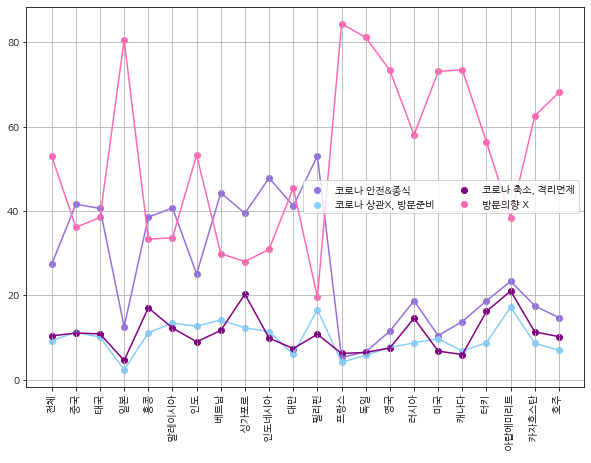

In [ ]:
#'ÎÇòÎäî 2024ÎÖÑÍπåÏßÄ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏóÜÎã§.'/'ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù'/'ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú'/'ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ'->Í∑∏ÎûòÌîÑ

a= koreatravel
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù'], color='mediumpurple')
plt.plot(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ'], color='lightskyblue')
plt.plot(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú'], color='purple')
plt.plot(a['Íµ≠Í∞Ä'],a['ÎÇòÎäî 2024ÎÖÑÍπåÏßÄ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏóÜÎã§.'], color='hotpink')
plt.scatter(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù'], color='mediumpurple',label = 'ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù')
plt.scatter(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ'], color='lightskyblue',label = 'ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ')
plt.scatter(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú'], color='purple', label = 'ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú')
plt.scatter(a['Íµ≠Í∞Ä'],a['ÎÇòÎäî 2024ÎÖÑÍπåÏßÄ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏóÜÎã§.'], color='hotpink',label = 'Î∞©Î¨∏ÏùòÌñ• X')
#plt.ylim([0,1800000]) 
#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='best', ncol=2)
plt.xticks(rotation=90)
plt.show()

-> 2024ÎÖÑÍπåÏßÄÏùò ÌïúÍµ≠Î∞©Î¨∏ÏùòÌñ•Ïóê ÎåÄÌïú ÎÇòÎùºÎ≥Ñ ÎãµÎ≥Ä Í∑∏ÎûòÌîÑÏûÖÎãàÎã§.(Ï†ÑÏ≤¥ÏùëÎãµÏûê Í∏∞Ï§Ä)

***Ïì∏ÏßÄÏïàÏì∏ÏßÄ Í≥†ÎØº*** ->ÏôúÎÉê.. Ï†ÑÏ≤¥ÏùëÎãµÏûêÎãàÍπå.. Î∞ëÏóê Ìï¥Ïô∏Ïó¨ÌñâÏùòÌñ•ÏûêÏôÄ ÌïúÍµ≠Ïù∏ÏßÄÏûêÍ∞Ä ÎçîÏö± Ïú†ÏùòÎØ∏Ìï† Í≤É Í∞ôÎã§.

In [ ]:
koreatravel2= data['2024ÎÖÑÍπåÏßÄÌïúÍµ≠Ïó¨ÌñâÏùòÌñ•(Ìï¥Ïô∏Ïó¨Ìñâ ÏùòÌñ•Ïûê,Ïù∏ÏßÄÏûê)']
koreatravel2['ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù']= koreatravel2['ÎÇòÎäî ÌïúÍµ≠Ïù¥ ÏΩîÎ°úÎÇò19Î°úÎ∂ÄÌÑ∞ ÏïàÏ†ÑÌïòÎã§Í≥† Ïó¨Í≤®Ïßà Îïå Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.']+koreatravel2['ÎÇòÎäî WHO Îì± Í≥µÏãùÍ∏∞Í¥ÄÏóêÏÑú ÏΩîÎ°úÎÇò 19 Ï¢ÖÏãù ÏÑ†Ïñ∏ÏùÑ Ìï† Í≤ΩÏö∞ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏ Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.']
koreatravel2['ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú'] =koreatravel2['ÎÇòÎäî ÌïúÍµ≠Ïó¨Ìñâ Ïãú ÏùòÎ¨¥ Í≤©Î¶¨Í∞Ä Ï∂ïÏÜåÎê† Í≤ΩÏö∞ Î∞©Î¨∏ Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.'] + koreatravel2['ÎÇòÎäî ÌïúÍµ≠Ïó¨Ìñâ Ïãú ÏùòÎ¨¥ Í≤©Î¶¨Í∞Ä Î©¥Ï†úÎê† Í≤ΩÏö∞ Î∞©Î¨∏ Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.']
koreatravel2['ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ'] = koreatravel2['ÎÇòÎäî ÌïúÍµ≠Ïó¨Ìñâ Ïãú Ïû•Í∏∞ ÏùòÎ¨¥Í≤©Î¶¨Í∞Ä ÏûàÎçîÎùºÎèÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§.'] + koreatravel2['ÎÇòÎäî Ïù¥ÎØ∏ ÌïúÍµ≠Ïó¨ÌñâÏùÑ Ï§ÄÎπÑÌïòÍ≥† ÏûàÎã§.']

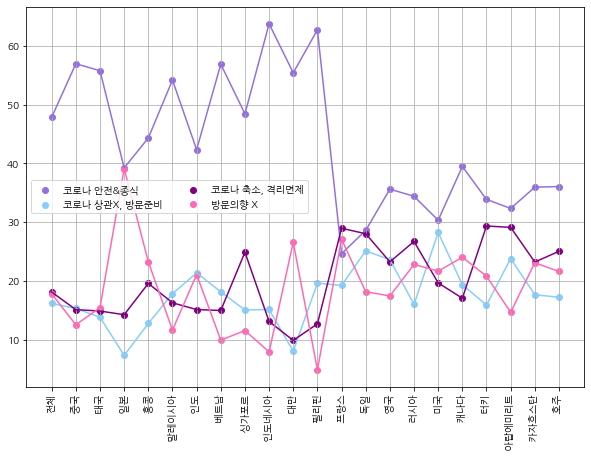

In [ ]:
a= koreatravel2
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù'], color='mediumpurple')
plt.plot(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ'], color='lightskyblue')
plt.plot(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú'], color='purple')
plt.plot(a['Íµ≠Í∞Ä'],a['ÎÇòÎäî 2024ÎÖÑÍπåÏßÄ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏóÜÎã§.'], color='hotpink')
plt.scatter(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù'], color='mediumpurple',label = 'ÏΩîÎ°úÎÇò ÏïàÏ†Ñ&Ï¢ÖÏãù')
plt.scatter(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ'], color='lightskyblue',label = 'ÏΩîÎ°úÎÇò ÏÉÅÍ¥ÄX, Î∞©Î¨∏Ï§ÄÎπÑ')
plt.scatter(a['Íµ≠Í∞Ä'],a['ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú'], color='purple', label = 'ÏΩîÎ°úÎÇò Ï∂ïÏÜå, Í≤©Î¶¨Î©¥Ï†ú')
plt.scatter(a['Íµ≠Í∞Ä'],a['ÎÇòÎäî 2024ÎÖÑÍπåÏßÄ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏóÜÎã§.'], color='hotpink',label = 'Î∞©Î¨∏ÏùòÌñ• X')
#plt.ylim([0,1800000]) 
#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='best', ncol=2)
plt.xticks(rotation=90)
plt.show()

->Ìï¥Ïô∏Ïó¨ÌñâÏùòÌñ•ÏûêÏôÄ ÌïúÍµ≠Ïù∏ÏßÄÏûê Í∏∞Ï§ÄÏúºÎ°ú 2024ÎÖÑÍπåÏßÄ ÌïúÍµ≠Î∞©Î¨∏ÏùòÌñ• Íµ≠Í∞ÄÎ≥Ñ ÎãµÎ≥ÄÍ∑∏ÎûòÌîÑÏûÖÎãàÎã§. Í∞ÄÏû• ÏôºÌé∏Ïùò Ï†ÑÏ≤¥Íµ≠Í∞ÄÏóêÏÑú ÏïΩ 48%Í∞Ä ÏΩîÎ°úÎÇòÍ∞Ä ÏïàÏ†ïÎêòÍ≥† Ï¢ÖÏãùÎê† Í≤ΩÏö∞ ÌïúÍµ≠ÏùÑ Î∞©Î¨∏Ìï† ÏùòÌñ•Ïù¥ ÏûàÎã§Í≥† ÎãµÎ≥ÄÌïòÏòÄÏäµÎãàÎã§. Íµ≠Í∞ÄÎ≥ÑÎ°úÎäî Ïù∏ÎèÑÎÑ§ÏãúÏïÑ, Î≤†Ìä∏ÎÇ®, ÌïÑÎ¶¨ÌïÄ, Ï§ëÍµ≠ Îì± ÎèôÏïÑÏãúÏïÑ Î∞è ÎèôÎÇ®ÏïÑÏãúÏïÑÏóêÏÑú Î∞©Î¨∏ÏùòÌñ•Ïù¥ ÎÜíÏïòÏäµÎãàÎã§.ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú ÏΩîÎ°úÎÇòÍ∞Ä ÏïàÏ†ïÎêòÍ≥† Ï¢ÖÏãùÎê† Í≤ΩÏö∞ Î∞©Î¨∏ÏùòÌñ•Ïù¥ ÎÜíÏäµÎãàÎã§. ÏµúÍ∑º ÎßéÏùÄ ÎÇòÎùºÏóêÏÑú ÏΩîÎ°úÎÇòÍ¥ÄÎ†® Í∑úÏ†úÎ•º ÏôÑÌôîÌïòÍ≥† ÏûàÏúºÎ©∞ Ï¢ÖÏãù Î∞è ÏúÑÎìú ÏΩîÎ°úÎÇòÏùò ÏÉÅÌô©ÏúºÎ°ú Î≥ÄÌôîÌïòÍ∏∞ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îäî ÌÅ∞ ÏùòÎØ∏Í∞Ä ÏûàÏäµÎãàÎã§.

In [ ]:
level = data['ÌïúÍµ≠Ïó¨Ìñâ ÏùòÌñ• ÏàòÏ§Ä(Î∞©Ìïú ÏùòÌñ•Ïûê Í∏∞Ï§Ä)']
level.head()

Íµ≠Í∞Ä      ÏÇ¨Î°ÄÏàò      Ï¥àÏ†ÅÍ∑πÏùòÌñ•       Ï†ÅÍ∑πÏùòÌñ•       ÏÜåÍ∑πÏùòÌñ•    Í≥Ñ
0    Ï†ÑÏ≤¥  (14481)  14.008137  12.857146  73.134717  100
1    Ï§ëÍµ≠   (3577)  16.842114  15.382136  67.775750  100
2    ÌÉúÍµ≠    (615)  16.118444  20.621037  63.260519  100
3    ÏùºÎ≥∏    (700)  35.251603  21.309631  43.438765  100
4    ÌôçÏΩ©    (667)   7.116705  19.216400  73.666895  100

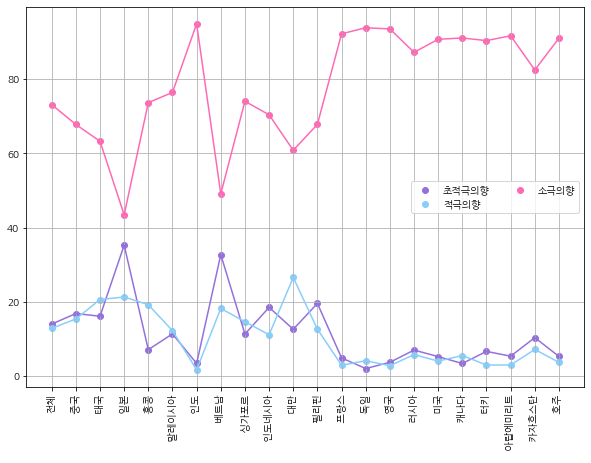

In [ ]:
a = level
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(a['Íµ≠Í∞Ä'],a['  Ï¥àÏ†ÅÍ∑πÏùòÌñ•'], color='mediumpurple')
plt.plot(a['Íµ≠Í∞Ä'],a['  Ï†ÅÍ∑πÏùòÌñ•'], color='lightskyblue')
plt.plot(a['Íµ≠Í∞Ä'],a['  ÏÜåÍ∑πÏùòÌñ•'], color='hotpink')
plt.scatter(a['Íµ≠Í∞Ä'],a['  Ï¥àÏ†ÅÍ∑πÏùòÌñ•'], color='mediumpurple',label = 'Ï¥àÏ†ÅÍ∑πÏùòÌñ•')
plt.scatter(a['Íµ≠Í∞Ä'],a['  Ï†ÅÍ∑πÏùòÌñ•'], color='lightskyblue',label = 'Ï†ÅÍ∑πÏùòÌñ•')
plt.scatter(a['Íµ≠Í∞Ä'],a['  ÏÜåÍ∑πÏùòÌñ•'], color='hotpink',label = 'ÏÜåÍ∑πÏùòÌñ•')
#plt.ylim([0,1800000]) 
#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='best', ncol=2)
plt.xticks(rotation=90)
plt.show()

->Î∞©Ìïú ÏùòÌñ•ÏûêÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ìïú ÌïúÍµ≠Î∞©Î¨∏ÏùòÌñ•ÏàòÏ§Ä Í∑∏ÎûòÌîÑÏûÖÎãàÎã§. Ïù¥Îäî Î∞©Ìïú ÏùòÌñ•ÏûêÍ∞Ä Ïã§Ï†ú Î∞©ÌïúÏùÑ Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄÏßÄÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§. ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú ÏÜåÍ∑πÏùòÌñ•Ïù¥ ÎÜíÏïòÏúºÎÇò ÏÜåÍ∑πÏùòÌñ•Ïù¥ ÎÇÆÍ≥† Ï¥àÏ†ÅÍ∑πÏùòÌñ•Ïù¥ ÎÜíÏùÄ ÎÇòÎùºÎäî **ÏùºÎ≥∏Í≥º Î≤†Ìä∏ÎÇ®**ÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
‚òÖÏùºÎ≥∏Ïùò Í≤ΩÏö∞ Î∞©ÌïúÏùòÌñ•Í∑∏ÎûòÌîÑÏóêÏÑú Î∞©Î¨∏ÏùòÌñ•Ïù¥ ÏóÜÎäî ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÏïòÏúºÎÇò Î∞©Ìïú ÏùòÌñ•Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÎì§ÏóêÏÑúÎäî Ï¥àÏ†ÅÍ∑πÏùòÌñ•Ïù¥ Í∞ÄÏû• ÎÜíÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§. Ïù¥Îäî Îã§Î•∏ Íµ≠Í∞ÄÏóê ÎπÑÌï¥ ÌïúÍµ≠Î∞©Î¨∏ Î∞è Í¥ÄÍ¥ëÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÎäî ÏÇ¨Î°ÄÍ∞Ä ÏùºÎ≥∏Ïù¥ Í∞ÄÏû• ÎÜíÏùÑ Í≤ÉÏûÑÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.‚òÖ

## ÌïúÍµ≠Î∞©Î¨∏Ïù¥Ïú†(Ï§ëÎ≥µÎãµÎ≥Ä)

In [ ]:
reason = data['ÌïúÍµ≠ Î∞©Î¨∏ Ïù¥Ïú†(Ï§ëÎ≥µ)']
reason= reason.transpose()
reason=reason.reset_index()
reason=reason.rename(columns=reason.iloc[0])
reason = reason.drop([0,1], axis=0)
reason.head(1)

Íµ≠Í∞Ä         Ï†ÑÏ≤¥         Ï§ëÍµ≠         ÌÉúÍµ≠         ÏùºÎ≥∏         ÌôçÏΩ©  \
2  Î¨∏Ìôî/Ï≤¥Ìóò Ï¶êÍ∏∏Í±∞Î¶¨Í∞Ä ÎßéÏïÑÏÑú  40.391049  34.591575  38.631934  24.487833  28.697915   

       ÎßêÎ†àÏù¥ÏãúÏïÑ         Ïù∏ÎèÑ        Î≤†Ìä∏ÎÇ®       Ïã±Í∞ÄÌè¨Î•¥      Ïù∏ÎèÑÎÑ§ÏãúÏïÑ         ÎåÄÎßå  \
2  42.798151  45.913037  32.478795  39.601569  64.347481  34.617663   

         ÌïÑÎ¶¨ÌïÄ        ÌîÑÎûëÏä§         ÎèÖÏùº         ÏòÅÍµ≠        Îü¨ÏãúÏïÑ         ÎØ∏Íµ≠  \
2  57.238281  43.075227  51.491855  52.442231  43.267572  44.986493   

         Ï∫êÎÇòÎã§         ÌÑ∞ÌÇ§     ÏïÑÎûçÏóêÎØ∏Î¶¨Ìä∏      Ïπ¥ÏûêÌùêÏä§ÌÉÑ         Ìò∏Ï£º  
2  43.458592  51.611834  44.168023  48.300323  42.588722

Text(0.5, 1.0, 'ÌïúÍµ≠Î∞©Î¨∏Ïù¥Ïú†')

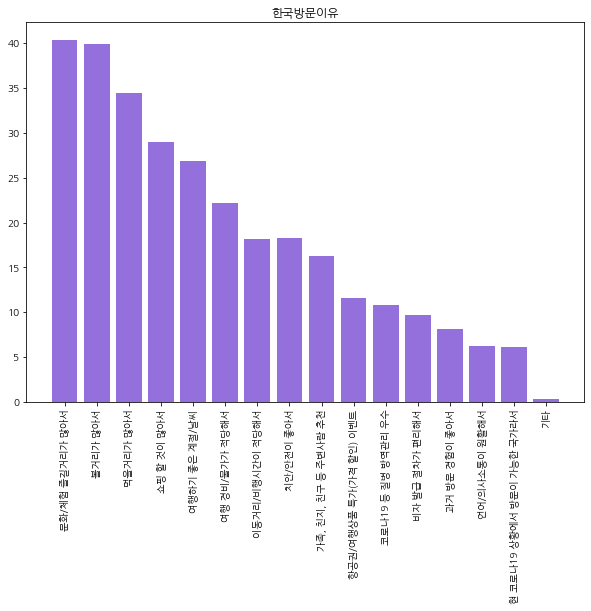

In [ ]:
a=reason
plt.figure(figsize=(10, 7))
plt.bar(a["Íµ≠Í∞Ä"],a["Ï†ÑÏ≤¥"], color='mediumpurple')
#plt.plot(a["Ìï≠Î™©"],a["Í¥ÄÍ¥ë"], color='mediumpurple')
plt.xticks(rotation=90)
plt.title("ÌïúÍµ≠Î∞©Î¨∏Ïù¥Ïú†")

->ÌïúÍµ≠Ïóê Î∞©Î¨∏ÌïòÍ≥† Ïã∂Îã§Í≥† ÎãµÎ≥ÄÌïú ÏùëÎãµÏûêÎ•º ÎåÄÏÉÅÏúºÎ°ú Í∑∏ Ïù¥Ïú†Î•º Í∑∏Î¶∞ Í∑∏ÎûòÌîÑÏûÖÎãàÎã§.(Ï†ÑÏ≤¥, Ï§ëÎ≥µÏùëÎãµ Í∞ÄÎä•) Í∑∏Í≤∞Í≥º, Î¨∏Ìôî/Ï≤¥Ìóò, Î≥ºÍ±∞Î¶¨, Î®πÏùÑÍ±∞Î¶¨Í∞Ä top3Î°ú Í∞ÄÏû• ÌÅ∞ Î∞©Î¨∏Ïù¥Ïú†Î•º Ï∞®ÏßÄÌñàÏäµÎãàÎã§. Îî∞ÎùºÏÑú ÎåÄÌëúÏ†ÅÏù∏ ÌïúÎ•òÏù∏ KpopÏùÑ ÎπÑÎ°ØÌïú ÌïúÎ•ò Ïª®ÌÖêÏ∏†ÏôÄ kfoodÏùò ÏòÅÌñ•ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

In [ ]:
reason3 = data['ÌïúÍµ≠ Î∞©Î¨∏ Ïù¥Ïú†(Ï§ëÎ≥µ)']
reason3 = reason3 .transpose()
reason3 = reason3 .reset_index()
reason3 = reason3 .rename(columns=reason3 .iloc[0])
reason3 = reason3 .drop([0], axis=0)
reason3 = reason3 [['Íµ≠Í∞Ä','Ï†ÑÏ≤¥']]
reason3  = reason3 .drop([1])

#wordcloudÎ•º ÏúÑÌï¥ Í∞ÑÎã®ÌïòÍ≤å Î≥ÄÍ≤Ω
reason3.loc[2,'Íµ≠Í∞Ä']="Î¨∏Ìôî/Ï≤¥Ìóò"
reason3.loc[3,'Íµ≠Í∞Ä']="Î≥ºÍ±∞Î¶¨"
reason3.loc[4,'Íµ≠Í∞Ä']="Î®πÏùÑÍ±∞Î¶¨"
reason3.loc[5,'Íµ≠Í∞Ä']="ÏáºÌïë"
reason3.loc[6,'Íµ≠Í∞Ä']="Ï¢ãÏùÄÍ≥ÑÏ†à/ÎÇ†Ïî®"
reason3.loc[7,'Íµ≠Í∞Ä']="Í≤ΩÎπÑ/Î¨ºÍ∞ÄÏ†ÅÎãπ"
reason3.loc[8,'Íµ≠Í∞Ä']="Ïù¥ÎèôÍ±∞Î¶¨/ÎπÑÌñâÏãúÍ∞ÑÏ†ÅÎãπ"
reason3.loc[9,'Íµ≠Í∞Ä']="ÏπòÏïà/ÏïàÏ†Ñ"
reason3.loc[10,'Íµ≠Í∞Ä']="Ï£ºÎ≥ÄÏÇ¨ÎûåÏù¥Ï∂îÏ≤ú"
reason3.loc[11,'Íµ≠Í∞Ä']="Ìï≠Í≥µÍ∂å/Ïó¨ÌñâÏÉÅÌíà Ïù¥Î≤§Ìä∏"
reason3.loc[12,'Íµ≠Í∞Ä']="Î∞©Ïó≠Ïö∞Ïàò"
reason3.loc[13,'Íµ≠Í∞Ä']="ÎπÑÏûêÏ†àÏ∞®Í∞ÑÌé∏"
reason3.loc[14,'Íµ≠Í∞Ä']="Í≥ºÍ±∞Î∞©Î¨∏Í≤ΩÌóòÏ¢ãÏùå"
reason3.loc[15,'Íµ≠Í∞Ä']="Ïñ∏Ïñ¥/ÏùòÏÇ¨ÏÜåÌÜµÏõêÌôú"
reason3.loc[16,'Íµ≠Í∞Ä']="ÏΩîÎ°úÎÇòÏÉÅÌô©ÏóêÏÑúÎ∞©Î¨∏Í∞ÄÎä•Íµ≠Í∞Ä"
reason3.loc[17,'Íµ≠Í∞Ä']="Í∏∞ÌÉÄ"


{'Î¨∏Ìôî/Ï≤¥Ìóò': 40.39104928220703, 'Î≥ºÍ±∞Î¶¨': 39.95255929470755, 'Î®πÏùÑÍ±∞Î¶¨': 34.43058398375834, 'ÏáºÌïë': 29.022641640099895, 'Ï¢ãÏùÄÍ≥ÑÏ†à/ÎÇ†Ïî®': 26.81762494932201, 'Í≤ΩÎπÑ/Î¨ºÍ∞ÄÏ†ÅÎãπ': 22.158994786864135, 'Ïù¥ÎèôÍ±∞Î¶¨/ÎπÑÌñâÏãúÍ∞ÑÏ†ÅÎãπ': 18.13324901915612, 'ÏπòÏïà/ÏïàÏ†Ñ': 18.27080401035485, 'Ï£ºÎ≥ÄÏÇ¨ÎûåÏù¥Ï∂îÏ≤ú': 16.310229732511853, 'Ìï≠Í≥µÍ∂å/Ïó¨ÌñâÏÉÅÌíà Ïù¥Î≤§Ìä∏': 11.619132698550638, 'Î∞©Ïó≠Ïö∞Ïàò': 10.796877420473828, 'ÎπÑÏûêÏ†àÏ∞®Í∞ÑÌé∏': 9.66876236356692, 'Í≥ºÍ±∞Î∞©Î¨∏Í≤ΩÌóòÏ¢ãÏùå': 8.136972895469388, 'Ïñ∏Ïñ¥/ÏùòÏÇ¨ÏÜåÌÜµÏõêÌôú': 6.209499491092591, 'ÏΩîÎ°úÎÇòÏÉÅÌô©ÏóêÏÑúÎ∞©Î¨∏Í∞ÄÎä•Íµ≠Í∞Ä': 6.179453271237402, 'Í∏∞ÌÉÄ': 0.30544517050031683}


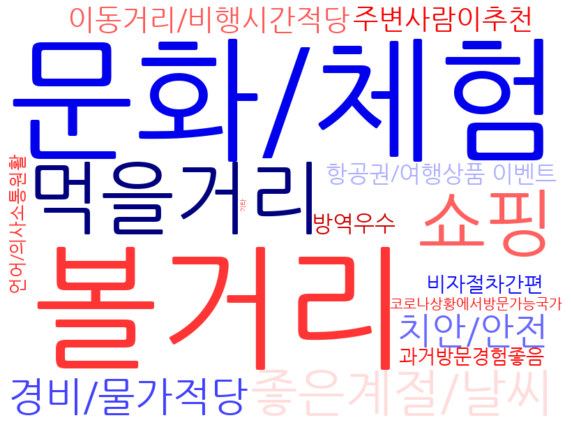

In [ ]:
count = reason3
data = dict(zip(count['Íµ≠Í∞Ä'].tolist(), count['Ï†ÑÏ≤¥'].tolist()))
print(data)
#def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    #return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(210,240),np.random.randint(90,100),np.random.randint(45,80)))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf' ,
               background_color='White', colormap = 'seismic',                 #Î∞∞Í≤ΩÏÉâ,font_path='C:/USERS/ÍπÄÏ£ºÏùÄ/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/NANUMSQUARE_ACR.TTF',
               width=800, height=600 )                                         #Îã®Ïñ¥Í∞ØÏàò
cloud = wc.generate_from_frequencies(data)                            #ÏÇ¨Ï†ÑÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞ ÎÑ£Í∏∞

plt.figure(figsize=(10,10))                                           #Ïï°ÏûêÏÇ¨Ïù¥Ï¶àÏÑ§Ï†ï
plt.axis('off')                                                       #ÌÖåÎëêÎ¶¨ ÏÑ† ÏóÜÏï†Í∏∞
plt.imshow(cloud,interpolation="bilinear")

->ÌïúÍµ≠Î∞©Î¨∏Ïù¥Ïú†Ïóê ÎåÄÌï¥ Ï§ëÎ≥µÏúºÎ°ú ÎãµÎ≥ÄÌïú ÎπÑÏú®ÏùÑ Îî∞Ï†∏Î≥¥ÏïòÏùÑÎïå, Î¨∏Ìôî/Ï≤¥Ìóò, Î≥ºÍ±∞Î¶¨, Î®πÏùÑÍ±∞Î¶¨Í∞Ä Í∞ÄÏû•ÌÅ∞ Î∞©Î¨∏Ïù¥Ïú†Î°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§. Í∑∏ÎÉ• ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Ìï¥Î≥∏Í≤É

In [ ]:
wc.to_file('ÌïúÍµ≠Î∞©Î¨∏Ïù¥Ïú†wordcloud.png')

In [ ]:
reason2 = data['ÌïúÍµ≠ Î∞©Î¨∏ Ïù¥Ïú†(Ï§ëÎ≥µ)']
reason2.head()


Íµ≠Í∞Ä      ÏÇ¨Î°ÄÏàò  Î¨∏Ìôî/Ï≤¥Ìóò Ï¶êÍ∏∏Í±∞Î¶¨Í∞Ä ÎßéÏïÑÏÑú   Î≥ºÍ±∞Î¶¨Í∞Ä ÎßéÏïÑÏÑú  Î®πÏùÑÍ±∞Î¶¨Í∞Ä ÎßéÏïÑÏÑú  ÏáºÌïë Ìï† Í≤ÉÏù¥ ÎßéÏïÑÏÑú  \
0    Ï†ÑÏ≤¥  (12625)        40.391049  39.952559  34.430584    29.022642   
1    Ï§ëÍµ≠   (3322)        34.591575  30.348033  33.699054    34.936934   
2    ÌÉúÍµ≠    (548)        38.631934  46.736622  26.722246    26.611438   
3    ÏùºÎ≥∏    (617)        24.487833  27.112309  50.672302    37.564401   
4    ÌôçÏΩ©    (621)        28.697915  35.956146  46.224385    35.945192   

   Ïó¨ÌñâÌïòÍ∏∞ Ï¢ãÏùÄ Í≥ÑÏ†à/ÎÇ†Ïî®  Ïó¨Ìñâ Í≤ΩÎπÑ/Î¨ºÍ∞ÄÍ∞Ä Ï†ÅÎãπÌï¥ÏÑú  Ïù¥ÎèôÍ±∞Î¶¨/ÎπÑÌñâÏãúÍ∞ÑÏù¥ Ï†ÅÎãπÌï¥ÏÑú  ÏπòÏïà/ÏïàÏ†ÑÏù¥ Ï¢ãÏïÑÏÑú  \
0      26.817625       22.158995        18.133249   18.270804   
1      21.862375       24.165170        23.804187   16.285147   
2      45.302362       20.857121        15.514191   13.604375   
3       6.993210       38.534427        42.714547   10.731793   
4      21.116740       31.503010        21.308550   13.128178   

   Í∞ÄÏ°±, ÏπúÏßÄ, ÏπúÍµ¨ Îì± Ï£ºÎ≥ÄÏÇ¨Îûå Ï∂îÏ≤ú  Ìï≠Í≥µÍ∂å/Ïó¨ÌñâÏÉÅÌíà ÌäπÍ∞Ä(Í∞ÄÍ≤© Ìï†Ïù∏) Ïù¥Î≤§Ìä∏  ÏΩîÎ°úÎÇò19 Îì± ÏßàÎ≥ë Î∞©Ïó≠Í¥ÄÎ¶¨ Ïö∞Ïàò  \
0             16.310230               11.619133           10.796877   
1             12.112334               11.711202           15.411851   
2             16.456490               10.817958           12.645539   
3             11.571228                5.641868            4.913136   
4             13.402510               13.886847            5.908508   

   ÎπÑÏûê Î∞úÍ∏â Ï†àÏ∞®Í∞Ä Ìé∏Î¶¨Ìï¥ÏÑú  Í≥ºÍ±∞ Î∞©Î¨∏ Í≤ΩÌóòÏù¥ Ï¢ãÏïÑÏÑú  Ïñ∏Ïñ¥/ÏùòÏÇ¨ÏÜåÌÜµÏù¥ ÏõêÌôúÌï¥ÏÑú  ÌòÑ ÏΩîÎ°úÎÇò19 ÏÉÅÌô©ÏóêÏÑú Î∞©Î¨∏Ïù¥ Í∞ÄÎä•Ìïú Íµ≠Í∞ÄÎùºÏÑú  \
0        9.668762       8.136973       6.209499                   6.179453   
1       14.683893       8.932250       8.515878                   7.275887   
2        5.310322       9.152782       4.354486                   5.534730   
3        5.937134      12.793335      11.127711                   5.500433   
4        7.495766      15.458649       4.037558                   3.509148   

         Í∏∞ÌÉÄ  
0  0.305445  
1  0.146776  
2  0.350208  
3  0.811596  
4  0.272717

Text(0.5, 1.0, 'ÌïúÍµ≠Î∞©Î¨∏Ïù¥Ïú†')

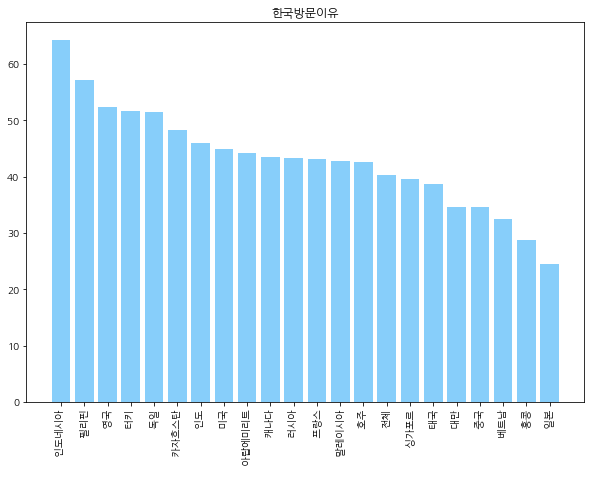

In [ ]:
reason2 = reason2.sort_values(by=['Î¨∏Ìôî/Ï≤¥Ìóò Ï¶êÍ∏∏Í±∞Î¶¨Í∞Ä ÎßéÏïÑÏÑú'], ascending=False)
a=reason2

plt.figure(figsize=(10, 7))
plt.bar(a["Íµ≠Í∞Ä"],a["Î¨∏Ìôî/Ï≤¥Ìóò Ï¶êÍ∏∏Í±∞Î¶¨Í∞Ä ÎßéÏïÑÏÑú"], color='lightskyblue')
#plt.plot(a["Ìï≠Î™©"],a["Í¥ÄÍ¥ë"], color='mediumpurple')
plt.xticks(rotation=90)
plt.title("ÌïúÍµ≠Î∞©Î¨∏Ïù¥Ïú†")


->Î¨∏Ìôî/Ï≤¥Ìóò Ï¶êÍ∏∏Í±∞Î¶¨Î•º Ïù¥Ïú†Î°ú ÌÉùÌïú ÎπÑÏú®ÏùÑ Íµ≠Í∞ÄÎ≥ÑÎ°ú ÏÇ¥Ìé¥Î≥¥ÏïòÏùÑ Îïå, Ïù∏ÎèÑÎÑ§ÏãúÏïÑ, ÌïÑÎ¶¨ÎØº, ÏòÅÍµ≠ ÏàúÏù¥ÏóàÏùå.

 ***Ìï¥Îãπ Í∑∏ÎûòÌîÑÎ•º Ïì∏ÏßÄÏïàÏì∏ÏßÄ Í≥†ÎØº***

## Î∞©Î¨∏Ïãú Ìù¨Îßù ÌôúÎèô(Ï§ëÎ≥µÎãµÎ≥Ä)

In [ ]:
#ÌïúÍµ≠ Î∞©Î¨∏Ïãú Ìù¨Îßù ÌôúÎèô(Ï§ëÎ≥µ)
activity = data['ÌïúÍµ≠ Î∞©Î¨∏Ïãú Ìù¨Îßù ÌôúÎèô(Ï§ëÎ≥µ)']

In [ ]:
activity = activity.transpose()
activity = activity.reset_index()
activity = activity.drop([0,1], axis=0)
activity = activity [['index',0]]
activity
#activity  = activity .drop([1])

index          0
2                                          ÏûêÏó∞ÌíçÍ≤Ω Í∞êÏÉÅ   56.18154
3                                         ÎßõÏßë/ÎØ∏Ïãù ÌÉêÎ∞©  55.466115
4                                               ÏáºÌïë  52.273341
5                                      Ïó≠ÏÇ¨/Î¨∏ÌôîÏú†Ï†ÅÏßÄ Î∞©Î¨∏   49.04071
6                                          Ï†ÑÌÜµÎ¨∏Ìôî Ï≤¥Ìóò  47.227248
7                                    ÎÜÄÏù¥Í≥µÏõê, ÌÖåÎßàÌååÌÅ¨ Î∞©Î¨∏  43.323981
8   ÌïúÎ•ò ÏΩòÌÖêÏ∏†(K-POP, K-DRAMA, K-MOVIE Îì±)/ÌïúÎ•òÏä§ÌÉÄ Í¥ÄÎ†® Î¨∏ÌôîÏ≤¥Ìóò   33.50588
9                             Ïú†Ìù•(Ïπ¥ÏßÄÎÖ∏, ÎÇòÏù¥Ìä∏ÎùºÏù¥ÌîÑ Ï≤¥Ìóò Îì±)   29.02034
10       ÌïúÎ•ò ÏΩòÌÖêÏ∏†/ÌïúÎ•òÏä§ÌÉÄ Í¥ÄÎ†® ÏóÜÎäî Ïó∞Í∑π/ÌÅ¥ÎûòÏãù/ÎÆ§ÏßÄÏª¨/ÏΩòÏÑúÌä∏ Îì± Í≥µÏó∞Ïû• Î∞©Î¨∏  22.480775
11                             Ï∫†Ìïë, Ìä∏ÎûòÌÇπ, ÎÇöÏãú Îì± Î†àÏ†Ä ÌôúÎèô  22.428934
12            Ìó§Ïñ¥ÏÉµ, ÎÑ§ÏùºÏºÄÏñ¥, ÎßàÏÇ¨ÏßÄ, ÌîºÎ∂ÄÍ≥º, ÏÑ±ÌòïÏô∏Í≥º Îì± ÎØ∏Ïö©ÏÑúÎπÑÏä§ Ï≤¥Ìóò  21.081316
13                           ÏöîÍ∞Ä, Î™ÖÏÉÅ, ÌîºÌä∏ÎãàÏä§ Îì± Ïõ∞ÎãàÏä§ ÌôúÎèô  13.145579
14                                     Ïä§Ìè¨Ï∏† Í¥ÄÎûå Î∞è Ï∞∏Í∞Ä  10.936644
15          Ï§ëÏ¶ùÏßàÌôò ÏπòÎ£å(Ïïî, Ïã¨Ïû•ÏàòÏà† Îì±), Í±¥Í∞ïÍ≤ÄÏßÑ Îì± ÏùºÎ∞ò ÏùòÎ£åÏÑúÎπÑÏä§ Ï≤¥Ìóò   8.823567
16                                              Í∏∞ÌÉÄ   0.173181

In [ ]:
#wordcloudÎ•º ÏúÑÌï¥ Í∞ÑÎã®ÌïòÍ≤å Î≥ÄÍ≤Ω
activity.loc[8,'index']="ÌïúÎ•òÎ¨∏ÌôîÏ≤¥Ìóò"
activity.loc[9,'index']="Ïú†Ìù•"
activity.loc[10,'index']="Í≥µÏó∞Ïû•"
activity.loc[11,'index']="Î†àÏ†Ä"
activity.loc[12,'index']="ÎØ∏Ïö©ÏÑúÎπÑÏä§"
activity.loc[13,'index']="Ïõ∞ÎãàÏä§"
activity.loc[14,'index']="Ïä§Ìè¨Ï∏†"
activity.loc[15,'index']="ÏùòÎ£åÏÑúÎπÑÏä§"
activity.loc[16,'index']="Í∏∞ÌÉÄ"

{'ÏûêÏó∞ÌíçÍ≤Ω Í∞êÏÉÅ': 56.18153982957557, 'ÎßõÏßë/ÎØ∏Ïãù ÌÉêÎ∞©': 55.46611452242517, 'ÏáºÌïë': 52.27334077111488, 'Ïó≠ÏÇ¨/Î¨∏ÌôîÏú†Ï†ÅÏßÄ Î∞©Î¨∏': 49.04070957313969, 'Ï†ÑÌÜµÎ¨∏Ìôî Ï≤¥Ìóò': 47.22724834770943, 'ÎÜÄÏù¥Í≥µÏõê, ÌÖåÎßàÌååÌÅ¨ Î∞©Î¨∏': 43.323980795884324, 'ÌïúÎ•òÎ¨∏ÌôîÏ≤¥Ìóò': 33.50588027396725, 'Ïú†Ìù•': 29.020339504212515, 'Í≥µÏó∞Ïû•': 22.48077527134199, 'Î†àÏ†Ä': 22.4289340148841, 'ÎØ∏Ïö©ÏÑúÎπÑÏä§': 21.08131635771947, 'Ïõ∞ÎãàÏä§': 13.145579326782075, 'Ïä§Ìè¨Ï∏†': 10.9366442273468, 'ÏùòÎ£åÏÑúÎπÑÏä§': 8.823567302377008, 'Í∏∞ÌÉÄ': 0.1731812582499825}


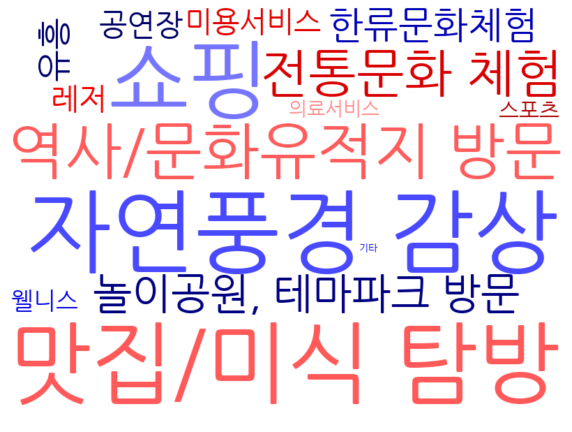

In [ ]:
count = activity
data = dict(zip(count['index'].tolist(), count[0].tolist()))
print(data)
#def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    #return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(210,240),np.random.randint(90,100),np.random.randint(45,80)))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf' ,
               background_color='White', colormap = 'seismic',                 #Î∞∞Í≤ΩÏÉâ,font_path='C:/USERS/ÍπÄÏ£ºÏùÄ/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/NANUMSQUARE_ACR.TTF',
               width=800, height=600 )                                         #Îã®Ïñ¥Í∞ØÏàò
cloud = wc.generate_from_frequencies(data)                            #ÏÇ¨Ï†ÑÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞ ÎÑ£Í∏∞

plt.figure(figsize=(10,10))                                           #Ïï°ÏûêÏÇ¨Ïù¥Ï¶àÏÑ§Ï†ï
plt.axis('off')                                                       #ÌÖåÎëêÎ¶¨ ÏÑ† ÏóÜÏï†Í∏∞
plt.imshow(cloud,interpolation="bilinear")

In [ ]:
wc.to_file('ÌïúÍµ≠Ìù¨ÎßùÌôúÎèôwordcloud.png')

Text(0.5, 1.0, 'ÌïúÍµ≠Î∞©Î¨∏Ïù¥Ïú†')

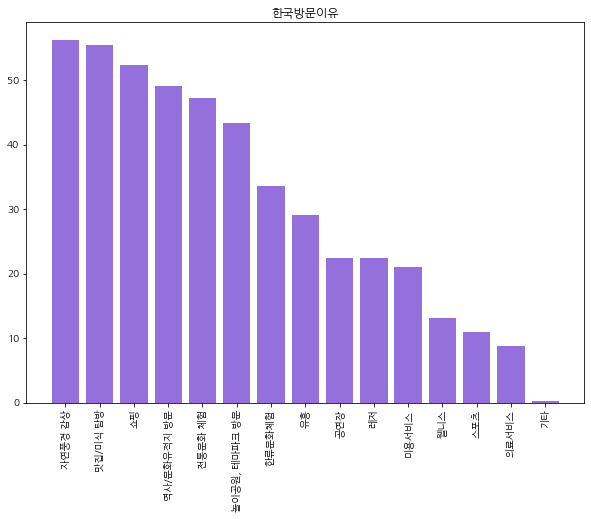

In [ ]:
a=activity
plt.figure(figsize=(10, 7))
plt.bar(a["index"],a[0], color='mediumpurple')
#plt.plot(a["Ìï≠Î™©"],a["Í¥ÄÍ¥ë"], color='mediumpurple')
plt.xticks(rotation=90)
plt.title("ÌïúÍµ≠Î∞©Î¨∏Ïù¥Ïú†")

->ÌïúÍµ≠ÏóêÏÑú ÌïòÍ≥† Ïã∂ÏùÄ ÌôúÎèôÏóê ÎåÄÌïú ÎãµÎ≥Ä ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏûÖÎãàÎã§. ÏûêÏó∞ÌíçÍ≤Ω Í∞êÏÉÅ, ÎßõÏßë, ÏáºÌïëÍ≥º ÎçîÎ∂àÏñ¥ **'Ï†ÑÌÜµÎ¨∏ÌôîÏ≤¥Ìóò'**Í≥º **'Ïó≠ÏÇ¨/Î¨∏ÌôîÏú†Ï†ÅÏßÄ Î∞©Î¨∏'**ÏùÑ Ìù¨ÎßùÌïòÎäî ÎãµÎ≥ÄÏùò ÎπÑÏú®Ïù¥ ÏïΩ 48%Î°ú ÎßéÏùÄ ÏàòÏöîÍ∞Ä ÏûàÏùåÏùÑ ÌôïÏù∏ÌïòÏòÄÏäµÎãàÎã§.

Ï∞∏Í≥†ÎßÅÌÅ¨ : https://jimmy-ai.tistory.com/37
